# **Start**


Library requirements


In [ ]:
# Core utilities
import warnings
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

# Statistical tests
from scipy.stats import chi2_contingency, randint

# Feature selection
from sklearn.feature_selection import mutual_info_classif

# Data splitting & validation
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    learning_curve,
    GridSearchCV,
)

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight

# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
import zipfile

with zipfile.ZipFile("train.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [6]:
warnings.filterwarnings("ignore")

df = pd.read_csv("train.csv")

In [5]:
print(df.shape)

df.info()

df.describe().T

(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print(missing_percent[missing_percent > 0])

Name                        9.985
Monthly_Inhand_Salary      15.002
Type_of_Loan               11.408
Num_of_Delayed_Payment      7.002
Num_Credit_Inquiries        1.965
Credit_History_Age          9.030
Amount_invested_monthly     4.479
Monthly_Balance             1.200
dtype: float64


In [4]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


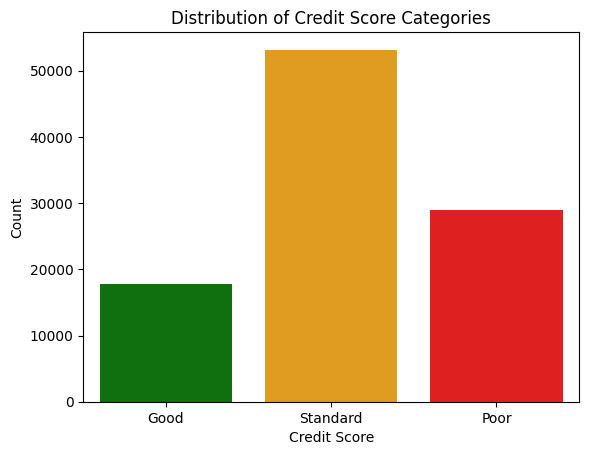

In [ ]:
# Distribution of Target Variable (Credit_Score)
print(df["Credit_Score"].value_counts())  # Count of each category
sns.countplot(data=df, x="Credit_Score", palette=["green", "orange", "red"])
plt.title("Distribution of Credit Score Categories")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

In [6]:
df.isna().sum(axis=1).max()
df[df.isna().sum(axis=1) == 5]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
896,0x1b42,CUS_0x365a,January,NaN,54,026-57-5729,Scientist,41345.58,NaN,0,...,_,646.47,23.041951,NaN,No,0.0,NaN,Low_spent_Small_value_payments,187.93428046477558,Standard
4490,0x3050,CUS_0x3019,March,NaN,51,346-10-4963,Writer,99007.68,8223.64,7,...,_,31.89,26.221277,NaN,No,0.0,NaN,High_spent_Small_value_payments,750.5733017643256,Good
7012,0x3f16,CUS_0x6171,May,NaN,52,584-89-4764,_______,149168.88,NaN,3,...,Good,903.48,43.610090,NaN,No,0.0,NaN,High_spent_Small_value_payments,1239.9888997857151,Good
56818,0x162ec,CUS_0x9ee4,March,NaN,7919,425-72-7007,Manager,102745.4,NaN,4,...,_,465.88,31.721489,NaN,No,0.0,NaN,High_spent_Large_value_payments,1036.0588129965113,Good
69031,0x1aa79,CUS_0x4eae,August,NaN,37,#F%$D@*&8,_______,44968.15,NaN,1,...,Good,871.85,34.451661,NaN,No,0.0,86.31346044034277,High_spent_Large_value_payments,506.52112289299055,Good
76326,0x1d538,CUS_0xa2ca,July,NaN,37,225-27-1573,Developer,37475.07,NaN,3,...,Good,437.45_,26.222415,NaN,No,0.0,42.17219171407305,High_spent_Large_value_payments,505.220058285927,Good
92669,0x234fb,CUS_0x4203,June,NaN,42,857-44-8236,Musician,39649.74,NaN,5,...,Good,1338.65,40.444954,NaN,No,0.0,401.81986192160866,Low_spent_Small_value_payments,195.99463807839143,Standard


# **Exploratory Data Analysis (EDA)**


# **DF1**


In [ ]:
# Define the columns to include in df1
columns_df1 = [
    "ID",
    "Customer_ID",
    "Month",
    "Name",
    "Age",
    "SSN",
    "Occupation",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Total_EMI_per_month",
]

# Read the specific columns for df1
df1 = pd.read_csv("train.csv", usecols=columns_df1)

print(df1.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Total_EMI_per_month  
0      19114.12            1824.843333            49.574949  
1      19114.12                    NaN            49.574949  
2      19114.12                    NaN            49.574949  
3      19114.12                    NaN            49.574949  
4      19114.12            1824.843333            49.574949  


In [8]:
# Check for missing values
print(df1.isnull().sum())

ID                           0
Customer_ID                  0
Month                        0
Name                      9985
Age                          0
SSN                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary    15002
Total_EMI_per_month          0
dtype: int64


# **Name**


In [9]:
 df1["Name"] = df1.groupby("Customer_ID")["Name"].transform(
    lambda x: x.fillna(x.mode()[0]))

(df1.groupby("Customer_ID")["Name"].count() == 8).all()

True

# **Month**


In [10]:
# Are all the month values equal to each other for each Customer id?
filtered_df = df1.groupby("Customer_ID")["Month"].unique()

filtered_df.apply(lambda x: set(x) == set(filtered_df.iloc[0])).all()

True

In [11]:
df1["Month"].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

# **Age**


In [12]:
df1[pd.to_numeric(df1["Age"], errors="coerce").isna()]["Age"].head(20)

8      28_
54     34_
58     30_
71     24_
89     33_
97     35_
123    30_
184    31_
227    40_
236    37_
240    54_
256    21_
277    37_
311    37_
326    33_
359    20_
381    30_
387    43_
399    38_
524    18_
Name: Age, dtype: object

In [13]:
df1["Age"] = df1["Age"].str.strip("_")

df1["Age"] = pd.to_numeric(df1["Age"], downcast="integer")

df1["Age"].dtype

dtype('int16')

In [ ]:
# Display the frequency of each unique age
age_frequency = df1["Age"].value_counts().sort_index()
print(age_frequency)

Age
-500      886
 14      1175
 15      1574
 16      1455
 17      1502
         ... 
 8674       1
 8678       1
 8682       1
 8697       1
 8698       1
Name: count, Length: 1728, dtype: int64


In [ ]:
# Flag invalid ages as missing
df1.loc[(df1["Age"] < 14) | (df1["Age"] > 56), "Age"] = pd.NA

# Impute missing ages using forward and backward fill within customer groups
df1["Age"] = df1.groupby("Customer_ID")["Age"].transform(lambda x: x.ffill().bfill())
# Validate the cleaned data
print(df1["Age"].isna().sum())  # Check for remaining missing values
print(df1["Age"].describe())  # Summary statistics for Age

0
count    100000.000000
mean         33.309240
std          10.764996
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64


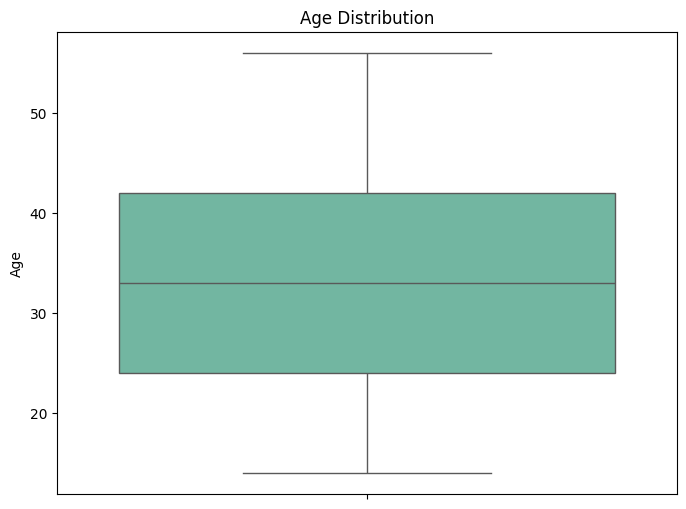

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y="Age", palette="Set2")
plt.title("Age Distribution")
plt.show()

In [ ]:
# drop ages under 18
df1 = df1[df1["Age"] >= 18]

# **SSN**


In [18]:
df1.SSN.value_counts()

SSN
#F%$D@*&8      5232
078-73-5990       8
565-34-6703       8
420-90-0566       8
426-87-7817       8
               ... 
864-98-6255       1
356-44-7304       1
586-32-9609       1
647-63-8564       1
693-40-9693       1
Name: count, Length: 11812, dtype: int64

In [ ]:
df1[["SSN"]].value_counts().value_counts()

count
8       7394
7       3534
6        719
5        105
3         20
4         18
1         12
2          9
5232       1
Name: count, dtype: int64

In [ ]:
df1.loc[df1["SSN"] == "#F%$D@*&8", "SSN"] = pd.NA

df1["SSN"] = df1.groupby("Customer_ID")["SSN"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)

df1["SSN"].isna().sum()

1

In [21]:
# Drop rows where SSN is still missing
df1 = df1[df1["SSN"].notna()]

# **Occupation**


In [22]:
print(df1["Occupation"].value_counts())

Occupation
_______          6643
Lawyer           6213
Architect        5997
Engineer         5985
Scientist        5926
Mechanic         5915
Accountant       5906
Developer        5891
Media_Manager    5854
Journalist       5818
Teacher          5784
Entrepreneur     5778
Doctor           5700
Manager          5604
Musician         5583
Writer           5525
Name: count, dtype: int64


In [23]:
# Replace placeholder values with NA
df1["Occupation"] = df1["Occupation"].replace("_______", pd.NA)

# Validate replacement
print("Number of missing values:", df1["Occupation"].isna().sum())

Number of missing values: 6643


In [ ]:
# Define a function to fill missing Occupation values with the mode
def fill_occupation_mode(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode.iloc[0])
    return group


# Use groupby with transform to apply the function
df1["Occupation"] = df1.groupby("Customer_ID")["Occupation"].transform(
    lambda group: fill_occupation_mode(group)
)

# Validate the cleaning process
print("Is Customer_ID unique:", df1["Customer_ID"].is_unique)  # Should return False
print("Remaining missing values in Occupation:", df1["Occupation"].isna().sum())

Is Customer_ID unique: False
Remaining missing values in Occupation: 1


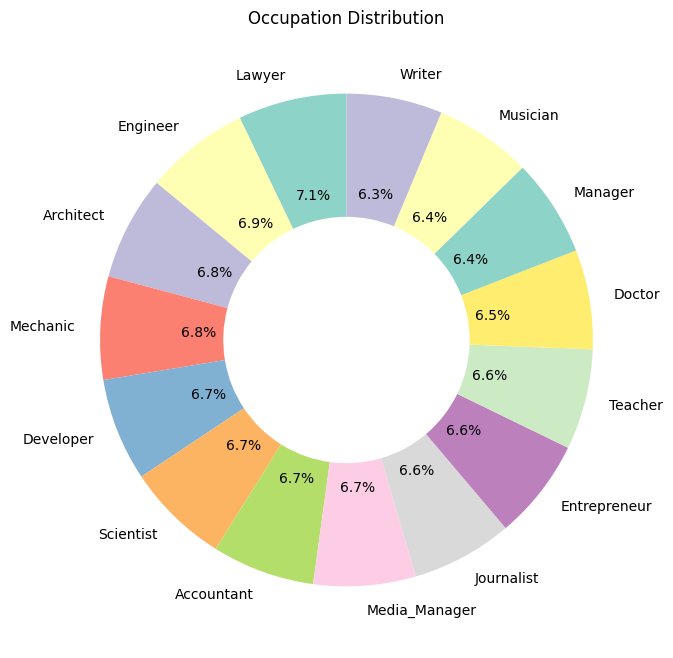

In [ ]:
# Plot the cleaned Occupation distribution
plt.figure(figsize=(8, 8))
df1["Occupation"].value_counts().plot.pie(
    autopct="%.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.5),
    colors=plt.cm.Set3.colors,
)
plt.title("Occupation Distribution")
plt.ylabel("")  # Remove default ylabel
plt.show()

# **Monthly_Inhand_Salary**


In [26]:
df1["Monthly_Inhand_Salary"].value_counts().sample(20)

Monthly_Inhand_Salary
8342.260000     7
1625.188333     7
6148.627500     6
4817.662500     6
5741.443333     6
5989.132500     6
3604.840962     7
1704.873333     8
7860.352500     3
2104.560833     8
13543.320000    5
631.702083      8
1824.843333     4
2490.888333     5
2765.995000     6
1712.612500     7
1618.491667     6
9154.995000     8
1027.652500     8
2571.831667     5
Name: count, dtype: int64

In [27]:
# Count total missing values in Monthly_Inhand_Salary
missing_count = df1["Monthly_Inhand_Salary"].isna().sum()
print(f"Total missing values in Monthly_Inhand_Salary: {missing_count}")

Total missing values in Monthly_Inhand_Salary: 14085


In [ ]:
df1["Monthly_Inhand_Salary"] = df1.groupby("Customer_ID")[
    "Monthly_Inhand_Salary"
].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df1["Monthly_Inhand_Salary"].isna().sum()

1

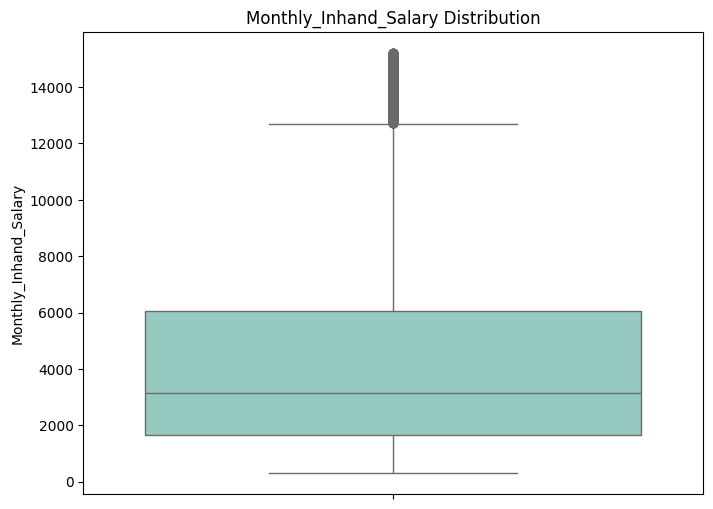

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y="Monthly_Inhand_Salary", palette="Set3")
plt.title("Monthly_Inhand_Salary Distribution")
plt.show()

# **Annual Income**


In [ ]:
df1[pd.to_numeric(df1["Annual_Income"], errors="coerce").isna()]["Annual_Income"].head(
    20
)

10      34847.84_
27      30689.89_
32      35547.71_
56      34081.38_
66     114838.41_
94      88640.24_
98      54392.16_
106     8701.545_
111     8701.545_
115     25546.26_
129     92047.08_
151     97791.42_
175    10183.015_
180    106733.13_
188    12600.445_
197     57983.12_
214     34290.12_
217     43070.24_
231    6515990.0_
235     39641.54_
Name: Annual_Income, dtype: object

In [ ]:
# Convert the column to string first, then strip unwanted characters
df1["Annual_Income"] = df1["Annual_Income"].astype(str).str.strip("_")

# Convert the column back to numeric after cleaning
df1["Annual_Income"] = pd.to_numeric(
    df1["Annual_Income"], downcast="integer", errors="coerce"
)

# Check the data type
print(df1["Annual_Income"].dtype)

float64


In [32]:
df1.groupby("Customer_ID")["Annual_Income"].unique().sample(20)

Customer_ID
CUS_0x9415                [139711.0]
CUS_0x6320                [72309.42]
CUS_0x620b                 [9732.57]
CUS_0x1aa0                [62848.83]
CUS_0x490e                [57296.46]
CUS_0x69c8       [81268.79999999999]
CUS_0xa5ba                 [73732.4]
CUS_0x6c8e                [19098.69]
CUS_0x9819                [24363.78]
CUS_0xe05                 [47682.36]
CUS_0x2ee4                [20818.74]
CUS_0x3757                [32176.68]
CUS_0x5a7b                [61319.37]
CUS_0x6dd3                [26693.06]
CUS_0xabc9                [28415.93]
CUS_0x3c0b               [18331.415]
CUS_0x221f    [18733.04, 22043331.0]
CUS_0x4f32                [32469.29]
CUS_0x44c5                [7136.905]
CUS_0x981a                [39693.86]
Name: Annual_Income, dtype: object

In [ ]:
filtered_df = df1.groupby("Customer_ID")["Annual_Income"].agg(
    lambda x: x.mode().iloc[0]
)

# Replace 'annual_income' values if they exceed 1.5 years' worth of 'monthly_inhand_salary',
# to account for possible bonuses or other income sources.
df1.loc[df1["Annual_Income"] > df1["Monthly_Inhand_Salary"] * 18, "Annual_Income"] = (
    df1["Customer_ID"].map(filtered_df)
)

In [34]:
df1.groupby("Customer_ID")["Annual_Income"].value_counts().value_counts()

count
8    11712
6       21
3       17
7       15
5       14
1       12
4       11
2        9
Name: count, dtype: int64

In [35]:
df1.isna().sum()

ID                       0
Customer_ID              0
Month                    0
Name                     0
Age                      0
SSN                      0
Occupation               1
Annual_Income            0
Monthly_Inhand_Salary    1
Total_EMI_per_month      0
dtype: int64

In [ ]:
customer_counts = df1.groupby("Customer_ID").size()
print(
    customer_counts.value_counts()
)  # Check how many customers have 8 rows, 7 rows, etc.

8    11712
6       21
3       17
7       15
5       14
1       12
4       11
2        9
Name: count, dtype: int64


In [37]:
consistent_customers = customer_counts[customer_counts == 8].index
df1 = df1[df1["Customer_ID"].isin(consistent_customers)]

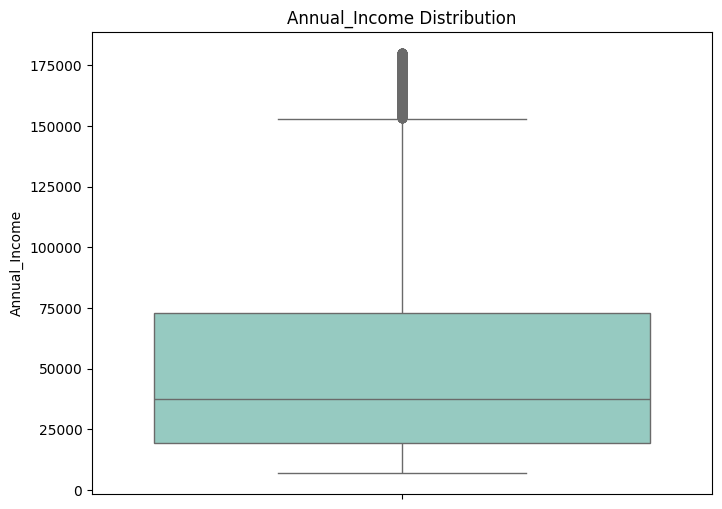

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y="Annual_Income", palette="Set3")
plt.title("Annual_Income Distribution")
plt.show()

# **total_emi_per_month**


Some customers still have inconsistent EMI values. Investigate further.


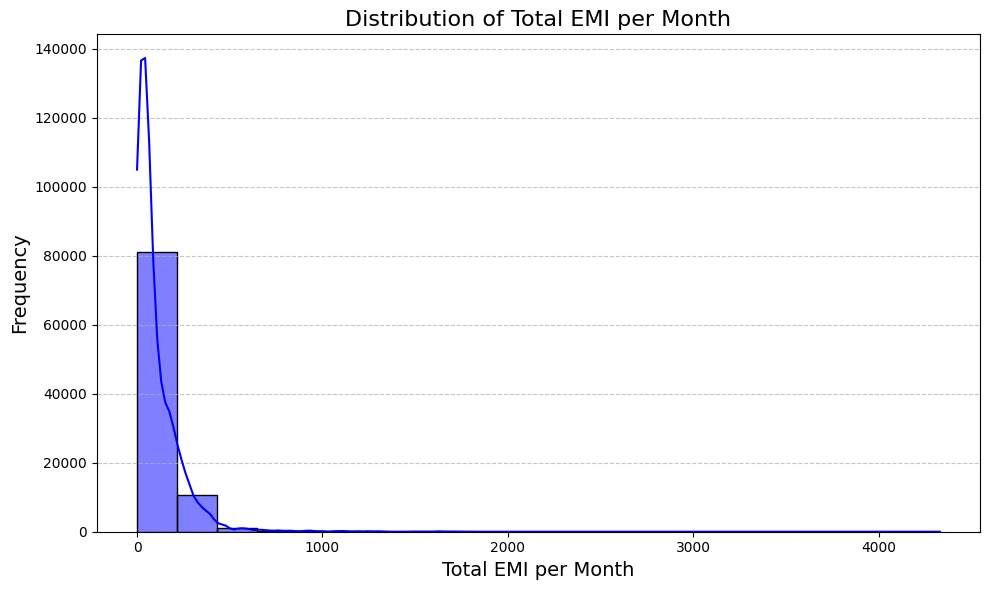

In [ ]:
# Identify outliers where EMI exceeds a reasonable fraction of the monthly salary (35% instead of 30%)
df1["Total_EMI_per_month"] = pd.to_numeric(df1["Total_EMI_per_month"], errors="coerce")
df1.loc[
    df1["Total_EMI_per_month"] > (df1["Monthly_Inhand_Salary"] * 0.35),
    "Total_EMI_per_month",
] = np.nan

# Replace missing or inconsistent EMI values with the mode within each Customer_ID group
# Compute the mode for each Customer_ID group
emi_modes = df1.groupby("Customer_ID")["Total_EMI_per_month"].transform(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Replace missing values with the computed mode
df1["Total_EMI_per_month"] = df1["Total_EMI_per_month"].fillna(emi_modes)

# Validate that each customer now has consistent EMI values
emi_counts = df1.groupby("Customer_ID")["Total_EMI_per_month"].nunique()
multiple_values = emi_counts[
    emi_counts > 1
]  # Find customers with more than one unique EMI value

if multiple_values.empty:
    print("All customers now have consistent Total_EMI_per_month values.")
else:
    print("Some customers still have inconsistent EMI values. Investigate further.")

# Visualize the cleaned Total_EMI_per_month distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="Total_EMI_per_month", bins=20, kde=True, color="blue")
plt.title("Distribution of Total EMI per Month", fontsize=16)
plt.xlabel("Total EMI per Month", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93696 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     93696 non-null  object 
 1   Customer_ID            93696 non-null  object 
 2   Month                  93696 non-null  object 
 3   Name                   93696 non-null  object 
 4   Age                    93696 non-null  float64
 5   SSN                    93696 non-null  object 
 6   Occupation             93696 non-null  object 
 7   Annual_Income          93696 non-null  float64
 8   Monthly_Inhand_Salary  93696 non-null  float64
 9   Total_EMI_per_month    93696 non-null  float64
dtypes: float64(4), object(6)
memory usage: 7.9+ MB


# **DF2**


In [ ]:
columns_to_use = [
    "Customer_ID",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Type_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Credit_Mix",
    "Outstanding_Debt",
]

df2 = pd.read_csv("train.csv", usecols=columns_to_use)

df2.head(20)

,Customer_ID,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
0,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98
1,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98
2,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98
3,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98
4,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98
5,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98
6,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98
7,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98
8,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03
9,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03


# **Num_Bank_Accounts**


In [42]:
df2["Num_Bank_Accounts"].value_counts().sort_index().head(20)

Num_Bank_Accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
Name: count, dtype: int64

In [ ]:
df2.loc[
    (df2["Num_Bank_Accounts"] < 0) | (df2["Num_Bank_Accounts"] > 11),
    "Num_Bank_Accounts",
] = pd.NA

df2["Num_Bank_Accounts"] = df2.groupby("Customer_ID")["Num_Bank_Accounts"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)

df2["Num_Bank_Accounts"].isna().sum()

0

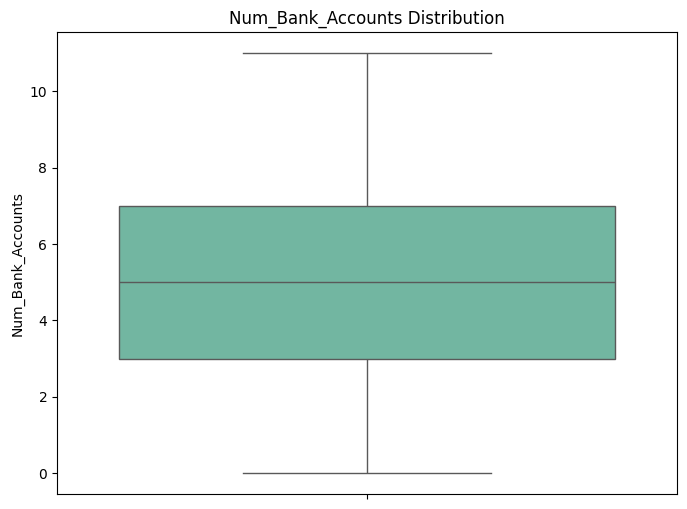

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Num_Bank_Accounts", palette="Set2")
plt.title("Num_Bank_Accounts Distribution")
plt.show()

# **Num_Credit_Card**


In [45]:
df2["Num_Credit_Card"].value_counts().sort_index().head(20)

Num_Credit_Card
0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: count, dtype: int64

In [ ]:
df2.loc[df2["Num_Credit_Card"] > 11, "Num_Credit_Card"] = pd.NA

df2["Num_Credit_Card"] = df2.groupby("Customer_ID")["Num_Credit_Card"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)

df2["Num_Credit_Card"].isna().sum()

0

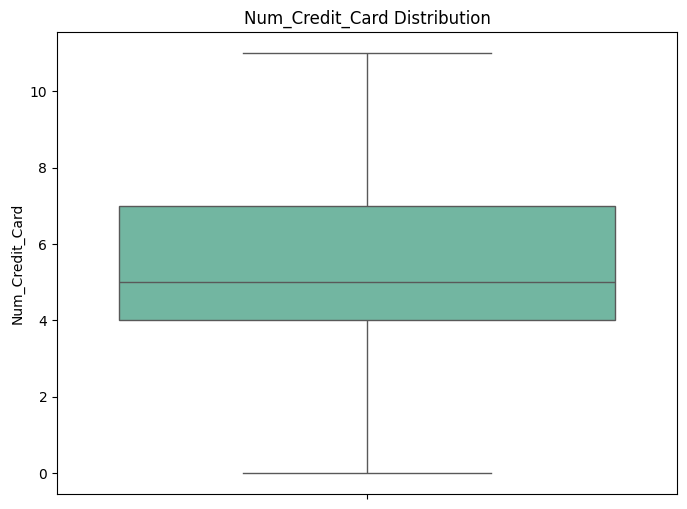

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Num_Credit_Card", palette="Set2")
plt.title("Num_Credit_Card Distribution")
plt.show()

# **Interest_Rate**


In [48]:
df2.Interest_Rate.value_counts().sort_index().head(20)

Interest_Rate
1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
Name: count, dtype: int64

In [49]:
# Flag interest rates greater than 34 as missing
outlier_mask = df2["Interest_Rate"] > 34
df2.loc[outlier_mask, "Interest_Rate"] = None

In [ ]:
# Create a mode dictionary for each customer
mode_dict = df2.groupby("Customer_ID")["Interest_Rate"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Map the mode values to the missing entries
df2["Interest_Rate"] = df2.apply(
    lambda row: mode_dict[row["Customer_ID"]]
    if pd.isna(row["Interest_Rate"])
    else row["Interest_Rate"],
    axis=1,
)

In [51]:
# Fill missing values with the mode of Interest_Rate per Customer_ID
df2["Interest_Rate"] = df2.groupby("Customer_ID")["Interest_Rate"].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)

In [52]:
# Check for remaining missing values
missing_values = df2["Interest_Rate"].isna().sum()
print(f"Remaining missing values in Interest_Rate: {missing_values}")

Remaining missing values in Interest_Rate: 0


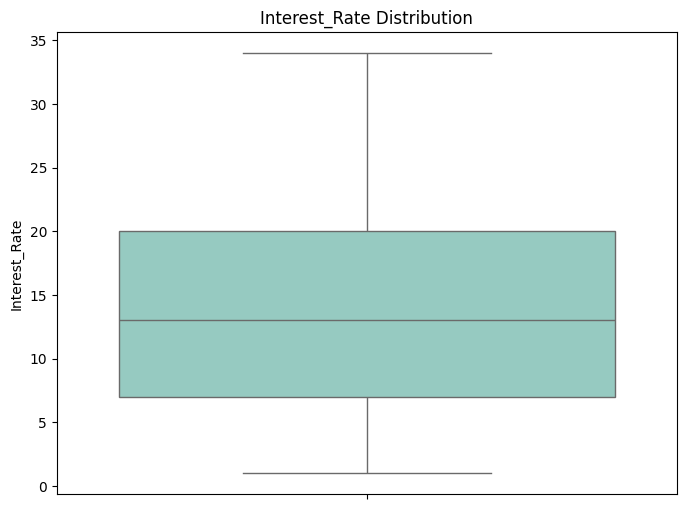

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Interest_Rate", palette="Set3")
plt.title("Interest_Rate Distribution")
plt.show()

# **Num_of_Loan**


In [54]:
df2[pd.to_numeric(df2["Num_of_Loan"], errors="coerce").isna()]["Num_of_Loan"].head(20)

37     0_
80     3_
84     3_
94     2_
119    5_
125    2_
131    0_
144    0_
158    5_
256    2_
360    8_
366    8_
377    2_
382    2_
391    9_
410    5_
442    4_
481    7_
483    7_
486    7_
Name: Num_of_Loan, dtype: object

Remaining missing values in Num_Of_Loan: 0


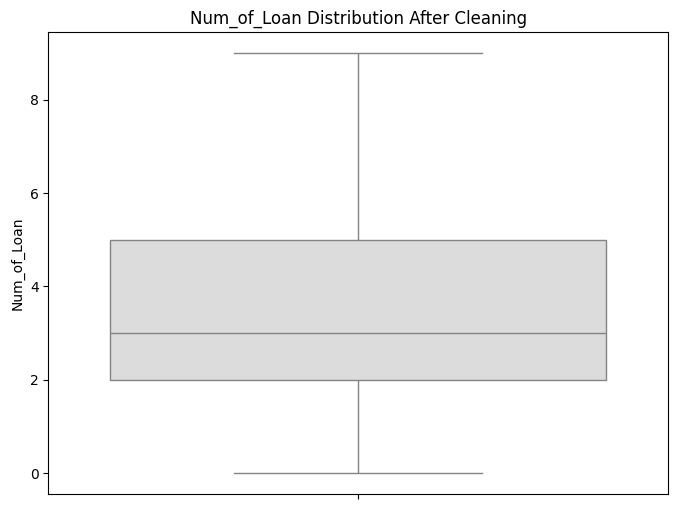

In [ ]:
# Clean and convert the 'Num_Of_Loan' attribute
df2["Num_of_Loan"] = df2["Num_of_Loan"].str.strip("_").astype(float)

# Identify invalid values and set them to NaN
df2.loc[(df2["Num_of_Loan"] < 0) | (df2["Num_of_Loan"] > 9), "Num_of_Loan"] = np.nan

# Impute missing values using forward and backward fill within each Customer_ID group
df2["Num_of_Loan"] = df2.groupby("Customer_ID")["Num_of_Loan"].transform(
    lambda x: x.ffill().bfill()
)

# Validate if all missing values are imputed
missing_values = df2["Num_of_Loan"].isna().sum()
print(f"Remaining missing values in Num_Of_Loan: {missing_values}")

# Visualize the distribution of 'Num_Of_Loan' after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Num_of_Loan", palette="coolwarm")
plt.title("Num_of_Loan Distribution After Cleaning")
plt.show()

# **Type_of_Loan**


In [ ]:
# Count how many unique 'type_of_loan' entries exist per customer
customer_loan_counts = (
    df2.groupby("Customer_ID")["Type_of_Loan"].value_counts().value_counts()
)

In [ ]:
# Identify missing values in 'type_of_loan'
missing_type_of_loan_count = df2["Type_of_Loan"].isna().sum()

In [ ]:
# Check if all customers with 0 'Num_of_Loan' have missing 'Type_of_Loan'
loan_count_zero_missing = df2.loc[df2["Num_of_Loan"] == 0, "Type_of_Loan"].isna().all()

# Replace missing 'Type_of_Loan' for customers with 0 loans
df2.loc[df2["Num_of_Loan"] == 0, "Type_of_Loan"] = "No Loan"

# Step 5: Remove " and" and split the types into lists
df2["Type_of_Loan"] = df2["Type_of_Loan"].str.replace(r" and", "", regex=True)
df2["Type_of_Loan"] = df2["Type_of_Loan"].str.split(", ")

# Count occurrences of each loan type
loan_type_counts = df2["Type_of_Loan"].explode().value_counts()

# Output sample
sample_type_of_loans = df2["Type_of_Loan"].sample(20)

print(customer_loan_counts)
print(missing_type_of_loan_count)
print(loan_count_zero_missing)
print(sample_type_of_loans)

count
8    11074
Name: count, dtype: int64
11408
True
38376    [Payday Loan, Debt Consolidation Loan, Not Spe...
12072    [Credit-Builder Loan, Personal Loan, Auto Loan...
8157     [Credit-Builder Loan, Auto Loan, Credit-Builde...
32646    [Student Loan, Credit-Builder Loan, Personal L...
83389             [Mortgage Loan, Debt Consolidation Loan]
86788    [Debt Consolidation Loan, Personal Loan, Home ...
27729                    [Auto Loan, Auto Loan, Auto Loan]
60900    [Auto Loan, Credit-Builder Loan, Student Loan,...
66555                 [Not Specified, Credit-Builder Loan]
96967    [Debt Consolidation Loan, Not Specified, Not S...
82698    [Student Loan, Credit-Builder Loan, Student Lo...
61921                                   [Home Equity Loan]
74832    [Personal Loan, Not Specified, Debt Consolidat...
62378                                            [No Loan]
64890    [Credit-Builder Loan, Auto Loan, Student Loan,...
43070                       [Not Specified, Personal Loan]
53

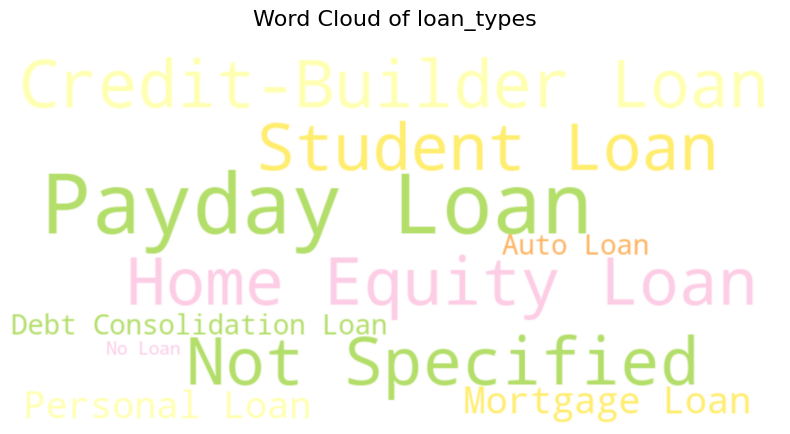

In [ ]:
loan_counts = df2["Type_of_Loan"].explode().value_counts()

wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="Set3"
).generate_from_frequencies(loan_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis("off")  # Eksenleri kapat
plt.title("Word Cloud of loan_types", fontsize=16, pad=10)
plt.show()

# **Delay_from_due_date**


In [ ]:
# Check unique value counts in ascending order of delay_from_due_date
value_counts = df2["Delay_from_due_date"].value_counts().sort_index()
print("Value counts for Delay_from_due_date:\n", value_counts)

Value counts for Delay_from_due_date:
 Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64


All records have valid differences within 30 days.


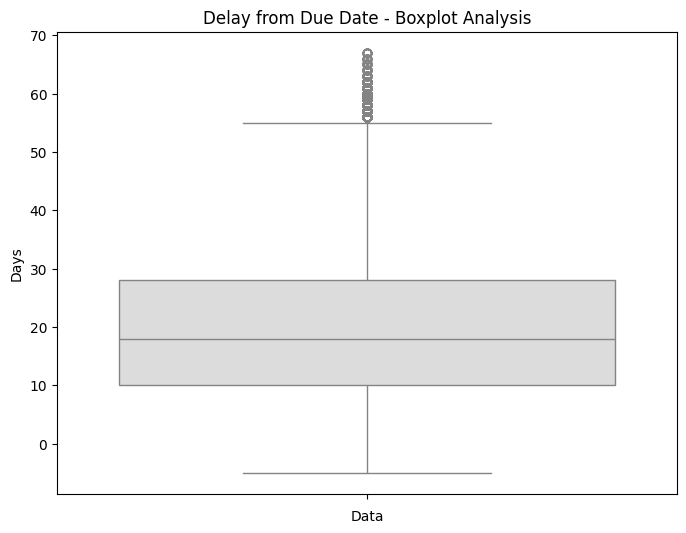

In [ ]:
# Verify no large consecutive differences
def validate_large_differences(data):
    differences = data.diff().abs()
    return (differences > 30).any()


# Group by 'customer_id' and apply validation
invalid_entries = df2.groupby("Customer_ID")["Delay_from_due_date"].apply(
    validate_large_differences
)
if invalid_entries.any():
    print("Warning: Found customer(s) with invalid large differences!")
else:
    print("All records have valid differences within 30 days.")

# Visualize the distribution using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Delay_from_due_date", palette="coolwarm")
plt.title("Delay from Due Date - Boxplot Analysis")
plt.ylabel("Days")
plt.xlabel("Data")
plt.show()

# **Num_of_Delayed_Payment**


In [ ]:
df2[pd.to_numeric(df2["Num_of_Delayed_Payment"], errors="coerce").isna()][
    "Num_of_Delayed_Payment"
].head(20)

1      NaN
4      NaN
6       8_
11      3_
30     NaN
32     NaN
33     NaN
53      3_
54      2_
70     NaN
95     NaN
106    NaN
119    13_
124    14_
140    NaN
141    12_
142    NaN
148    NaN
152    NaN
164    NaN
Name: Num_of_Delayed_Payment, dtype: object

In [ ]:
df2["Num_of_Delayed_Payment"] = pd.to_numeric(
    df2["Num_of_Delayed_Payment"].replace("-", ""), errors="coerce"
)

In [ ]:
invalid_mask = (df2["Num_of_Delayed_Payment"] < 0) | (
    df2["Num_of_Delayed_Payment"] > 28
)
df2.loc[invalid_mask, "Num_of_Delayed_Payment"] = np.nan  # Replace invalid with NaN

In [65]:
print(df2.index)

RangeIndex(start=0, stop=100000, step=1)


In [ ]:
df2["Num_of_Delayed_Payment"] = df2.groupby("Customer_ID")[
    "Num_of_Delayed_Payment"
].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [67]:
missing_count = df2["Num_of_Delayed_Payment"].isna().sum()
print(f"Remaining missing values in num_of_delayed_payment: {missing_count}")

Remaining missing values in num_of_delayed_payment: 0


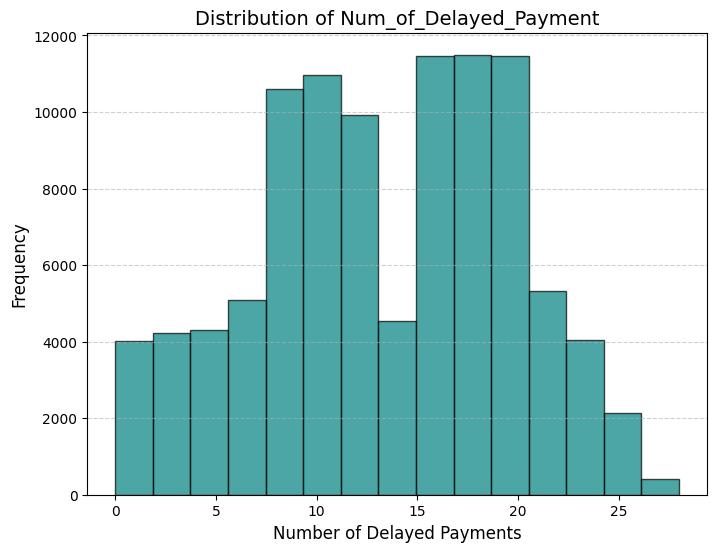

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(
    df2["Num_of_Delayed_Payment"],
    bins=15,  # Adjust bins to suit the data
    color="teal",
    alpha=0.7,
    edgecolor="black",
)
plt.title("Distribution of Num_of_Delayed_Payment", fontsize=14)
plt.xlabel("Number of Delayed Payments", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# **Changed_Credit_Limit**


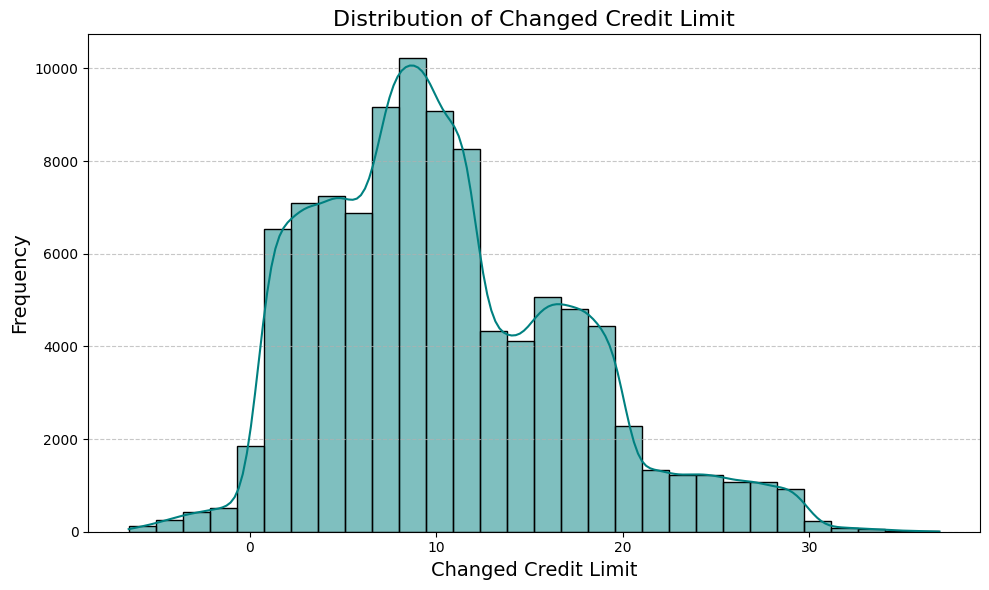

Number of missing values: 0


In [ ]:
# Replace '-' with NaN
df2.loc[df2["Changed_Credit_Limit"] == "-", "Changed_Credit_Limit"] = np.nan

# Convert the column to numeric
df2["Changed_Credit_Limit"] = pd.to_numeric(
    df2["Changed_Credit_Limit"], errors="coerce"
)

# Use group-wise forward and backward fill to impute missing values
df2["Changed_Credit_Limit"] = df2.groupby("Customer_ID")[
    "Changed_Credit_Limit"
].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Visualize the data using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x="Changed_Credit_Limit", bins=30, kde=True, color="teal")
plt.title("Distribution of Changed Credit Limit", fontsize=16)
plt.xlabel("Changed Credit Limit", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Verify no missing values remain
missing_values = df2["Changed_Credit_Limit"].isna().sum()
print(f"Number of missing values: {missing_values}")

# **Num_Credit_Inquiries**


In [ ]:
missing_values = df2["Num_Credit_Inquiries"].isna().sum()
print(f"Number of missing values in Num_Credit_Inquiries: {missing_values}")

Number of missing values in Num_Credit_Inquiries: 1965


In [71]:
unique_values = df2.groupby("Customer_ID")["Num_Credit_Inquiries"].unique()
print(unique_values.head())

Customer_ID
CUS_0x1000          [10.0, 11.0]
CUS_0x1009            [2.0, 4.0]
CUS_0x100b    [1.0, 2271.0, 4.0]
CUS_0x1011         [7.0, 1965.0]
CUS_0x1013                 [3.0]
Name: Num_Credit_Inquiries, dtype: object


In [ ]:
zero_values = df2[df2["Num_Credit_Inquiries"] == 0][
    ["Num_Credit_Inquiries", "Num_of_Loan"]
].head()
print(zero_values)

     Num_Credit_Inquiries  Num_of_Loan
120                   0.0          2.0
121                   0.0          2.0
128                   0.0          0.0
176                   0.0          0.0
177                   0.0          0.0


In [73]:
df2.loc[(df2["Num_Credit_Inquiries"] > 17), "Num_Credit_Inquiries"] = pd.NA

In [ ]:
df2["Num_Credit_Inquiries"] = df2.groupby("Customer_ID")[
    "Num_Credit_Inquiries"
].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [75]:
missing_values_post_imputation = df2["Num_Credit_Inquiries"].isna().sum()
print(f"Missing values after imputation: {missing_values_post_imputation}")

Missing values after imputation: 0


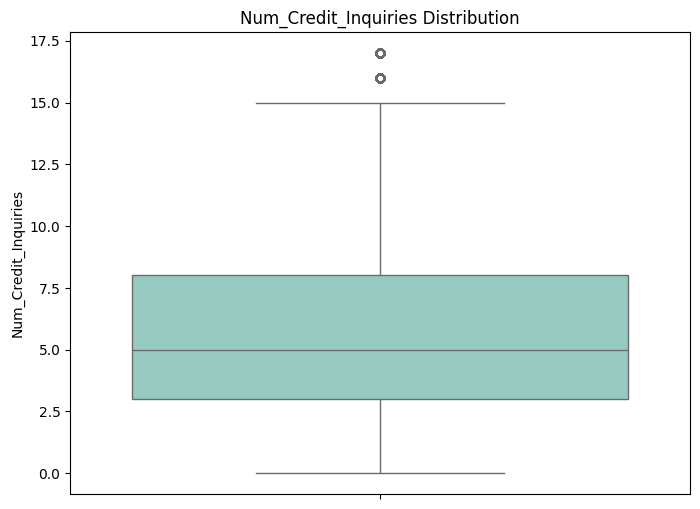

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="Num_Credit_Inquiries", palette="Set3")
plt.title("Num_Credit_Inquiries Distribution")
plt.show()

# **Credit_Mix**


In [77]:
df2.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [78]:
df2[["Customer_ID", "Credit_Mix"]].head(20)

,Customer_ID,Credit_Mix
0,CUS_0xd40,_
1,CUS_0xd40,Good
2,CUS_0xd40,Good
3,CUS_0xd40,Good
4,CUS_0xd40,Good
5,CUS_0xd40,Good
6,CUS_0xd40,Good
7,CUS_0xd40,Good
8,CUS_0x21b1,Good
9,CUS_0x21b1,Good


In [79]:
df2.groupby(["Customer_ID"])["Credit_Mix"].value_counts().head(20)

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
             _             1
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
             _             2
CUS_0x1026   Good          6
             _             2
CUS_0x102d   Good          7
             _             1
CUS_0x102e   Standard      6
             _             2
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
             _             1
Name: count, dtype: int64

In [ ]:
# Replace '-' with NaN to signify missing values
df2["Credit_Mix"] = df2["Credit_Mix"].replace("_", pd.NA)

# Fill missing values based on the mode of each 'Customer_ID' group
df2["Credit_Mix"] = df2.groupby("Customer_ID")["Credit_Mix"].transform(
    lambda group: group.fillna(group.mode().iloc[0])
    if not group.mode().empty
    else group
)

In [81]:
# Confirm that there are no remaining missing values
print("Remaining missing values in Credit_Mix:", df2["Credit_Mix"].isna().sum())

Remaining missing values in Credit_Mix: 0


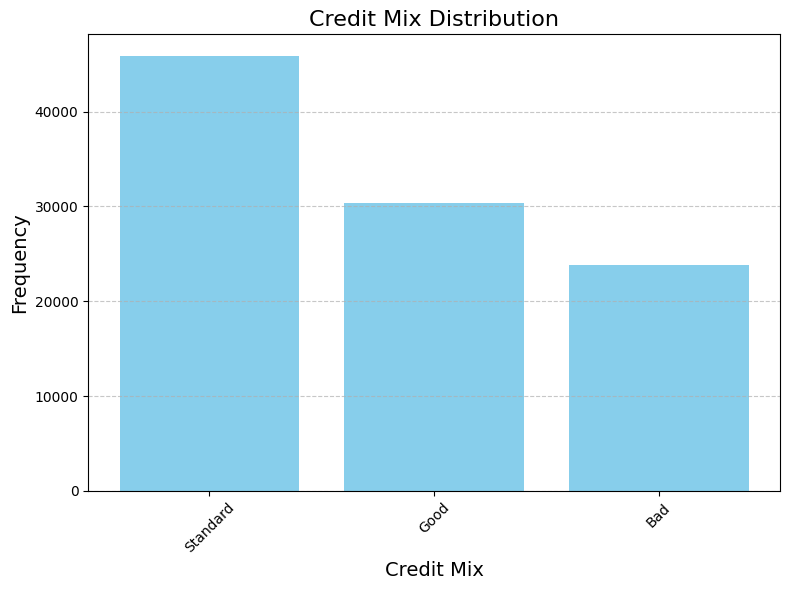

In [82]:
# Visualizing the distribution using a bar plot
credit_mix_counts = df2["Credit_Mix"].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(credit_mix_counts.index, credit_mix_counts.values, color="skyblue")
plt.title("Credit Mix Distribution", fontsize=16)
plt.xlabel("Credit Mix", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# **Outstanding_Debt**


In [83]:
df2.Outstanding_Debt.value_counts().sample(20)

Outstanding_Debt
198.53     8
969.83     8
140.29     8
1331.03    8
1552.17    8
1399.23    8
660.69     8
1190.67    7
4147.58    8
1272.54    8
3676.39    8
285.29_    1
1370.22    8
24.73      8
2142.89    8
613.9      8
275.92     8
2103.99    8
85.31      8
424.3      8
Name: count, dtype: int64

float64
Outstanding_Debt
0.23     8
0.34     8
0.54     8
0.56     8
0.77     8
0.95    16
1.20     8
1.23     8
1.30     8
1.33     8
1.37     8
1.42     8
1.48     8
2.04     8
2.13     8
2.43     8
3.31     8
3.50     8
3.68     8
3.74     8
Name: count, dtype: int64


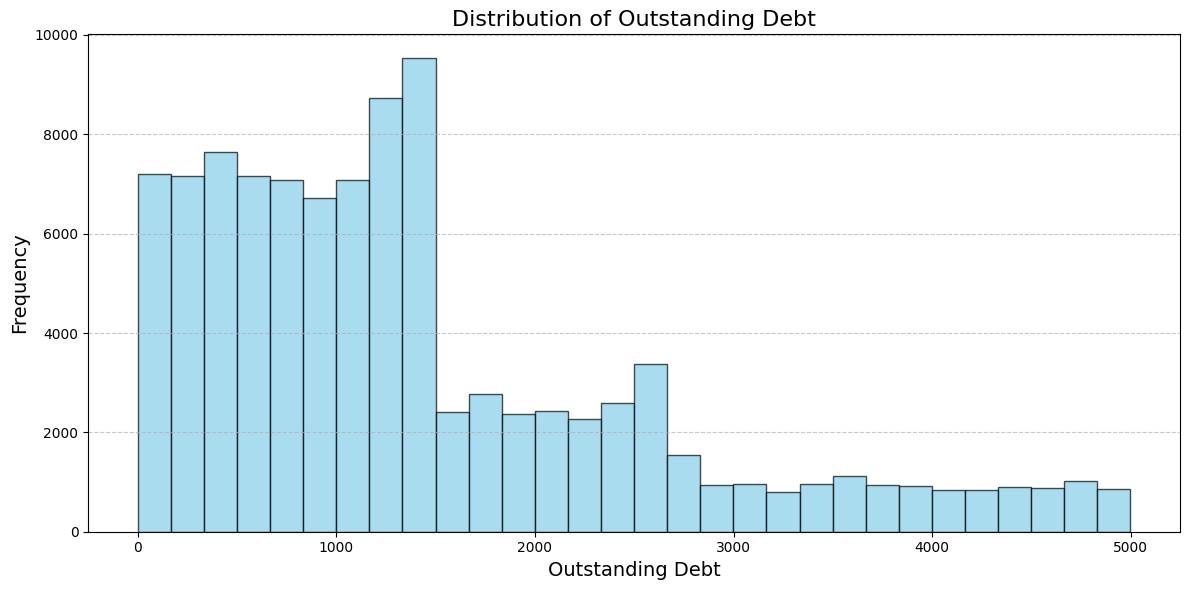

In [ ]:
# Remove any special characters or invalid data
df2["Outstanding_Debt"] = (
    df2["Outstanding_Debt"].str.replace("_", "", regex=False).str.strip()
)

# Convert the column to a numeric type with error coercion to handle any remaining invalid entries
df2["Outstanding_Debt"] = pd.to_numeric(df2["Outstanding_Debt"], errors="coerce")

print(df2["Outstanding_Debt"].dtype)

# Verify the unique value distribution
outstanding_debt_counts = df2["Outstanding_Debt"].value_counts().sort_index().head(20)
print(outstanding_debt_counts)

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.hist(
    df2["Outstanding_Debt"].dropna(),
    bins=30,
    alpha=0.7,
    edgecolor="black",
    color="skyblue",
    density=False,
)
plt.title("Distribution of Outstanding Debt", fontsize=16)
plt.xlabel("Outstanding Debt", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_ID             100000 non-null  object 
 1   Num_Bank_Accounts       100000 non-null  float64
 2   Num_Credit_Card         100000 non-null  float64
 3   Interest_Rate           100000 non-null  float64
 4   Num_of_Loan             100000 non-null  float64
 5   Type_of_Loan            100000 non-null  object 
 6   Delay_from_due_date     100000 non-null  int64  
 7   Num_of_Delayed_Payment  100000 non-null  float64
 8   Changed_Credit_Limit    100000 non-null  float64
 9   Num_Credit_Inquiries    100000 non-null  float64
 10  Credit_Mix              100000 non-null  object 
 11  Outstanding_Debt        100000 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 9.2+ MB


# **DF3**


In [ ]:
columns_to_use = [
    "Customer_ID",
    "Credit_Utilization_Ratio",
    "Payment_of_Min_Amount",
    "Amount_invested_monthly",
    "Payment_Behaviour",
    "Monthly_Balance",
    "Credit_Score",
]

df3 = pd.read_csv("train.csv", usecols=columns_to_use)

df3.head()

,Customer_ID,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,26.822620,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,31.944960,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,28.609352,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,31.377862,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,24.797347,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Payment_of_Min_Amount     100000 non-null  object 
 3   Amount_invested_monthly   95521 non-null   object 
 4   Payment_Behaviour         100000 non-null  object 
 5   Monthly_Balance           98800 non-null   object 
 6   Credit_Score              100000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


# **Credit_Utilization_Ratio**


In [88]:
df3.Credit_Utilization_Ratio.value_counts(dropna=False).sort_index()

Credit_Utilization_Ratio
20.000000    1
20.100770    1
20.172942    1
20.244130    1
20.257073    1
            ..
49.064277    1
49.254983    1
49.522324    1
49.564519    1
50.000000    1
Name: count, Length: 100000, dtype: int64

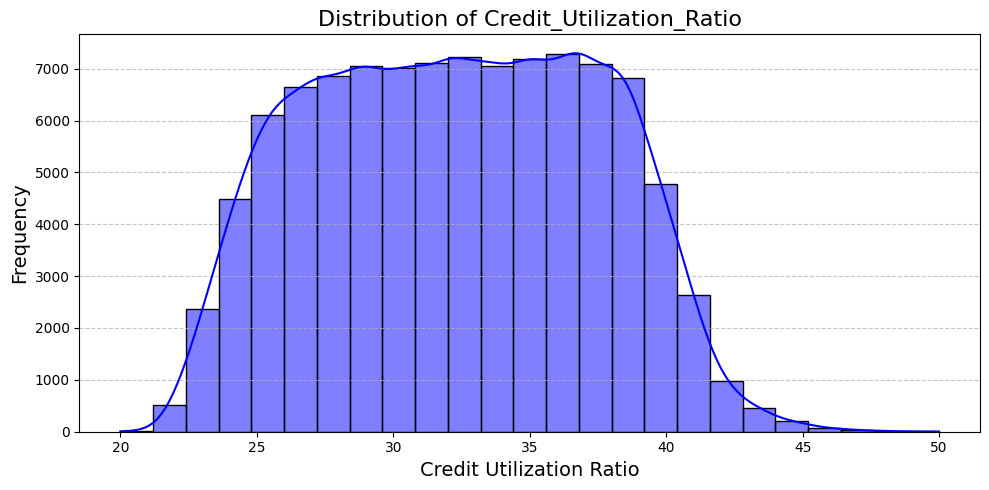

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="Credit_Utilization_Ratio", bins=25, kde=True, color="blue")

plt.title("Distribution of Credit_Utilization_Ratio", fontsize=16)
plt.xlabel("Credit Utilization Ratio", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# **Payment_of_Min_Amount**


In [ ]:
value_counts = df3["Payment_of_Min_Amount"].value_counts(dropna=False)
print(value_counts)

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [91]:
grouped_counts = (
    df3.groupby("Customer_ID")["Payment_of_Min_Amount"]
    .value_counts(dropna=False)
    .reset_index(name="count")
)
print(grouped_counts.head())

  Customer_ID Payment_of_Min_Amount  count
0  CUS_0x1000                   Yes      8
1  CUS_0x1009                   Yes      7
2  CUS_0x1009                    NM      1
3  CUS_0x100b                    No      7
4  CUS_0x100b                    NM      1


In [ ]:
unique_values = df3.groupby("Customer_ID")["Payment_of_Min_Amount"].nunique()
print(unique_values.value_counts())

Payment_of_Min_Amount
2    8009
1    4491
Name: count, dtype: int64


In [93]:
has_all_nm = (
    df3.groupby("Customer_ID")["Payment_of_Min_Amount"]
    .apply(lambda x: (x == "NM").all())
    .sum()
)
print(f"Number of customers with all NM values: {has_all_nm}")

Number of customers with all NM values: 0


In [ ]:
df3["Payment_of_Min_Amount"] = df3.groupby("Customer_ID")[
    "Payment_of_Min_Amount"
].transform(
    lambda x: x.replace("NM", x[x != "NM"].iloc[0] if not x[x != "NM"].empty else "No")
)

In [ ]:
final_value_counts = df3["Payment_of_Min_Amount"].value_counts()
print(final_value_counts)

Payment_of_Min_Amount
Yes    59432
No     40568
Name: count, dtype: int64


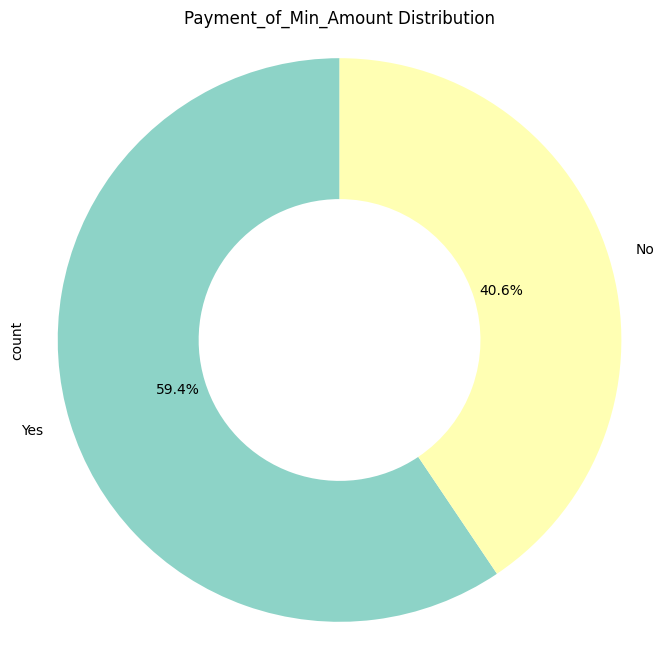

In [ ]:
plt.figure(figsize=(8, 8))
df3["Payment_of_Min_Amount"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Set3.colors,
    wedgeprops=dict(width=0.5),
)
plt.title("Payment_of_Min_Amount Distribution")
plt.axis("equal")
plt.show()

# **Amount_invested_monthly**


In [ ]:
df3[pd.to_numeric(df3["Amount_invested_monthly"], errors="coerce").isna()][
    "Amount_invested_monthly"
].value_counts(dropna=False)

Amount_invested_monthly
NaN          4479
__10000__    4305
Name: count, dtype: int64

In [ ]:
df3["Amount_invested_monthly"] = df3["Amount_invested_monthly"].replace(
    "__10000__", "10000"
)

In [ ]:
df3["Amount_invested_monthly"] = pd.to_numeric(
    df3["Amount_invested_monthly"], errors="coerce"
)

In [ ]:
df3["Amount_invested_monthly"] = df3.groupby("Customer_ID")[
    "Amount_invested_monthly"
].transform(lambda x: x.ffill().bfill())

In [ ]:
remaining_missing = df3["Amount_invested_monthly"].isna().sum()
print(f"Remaining Missing Values: {remaining_missing}")

Remaining Missing Values: 0


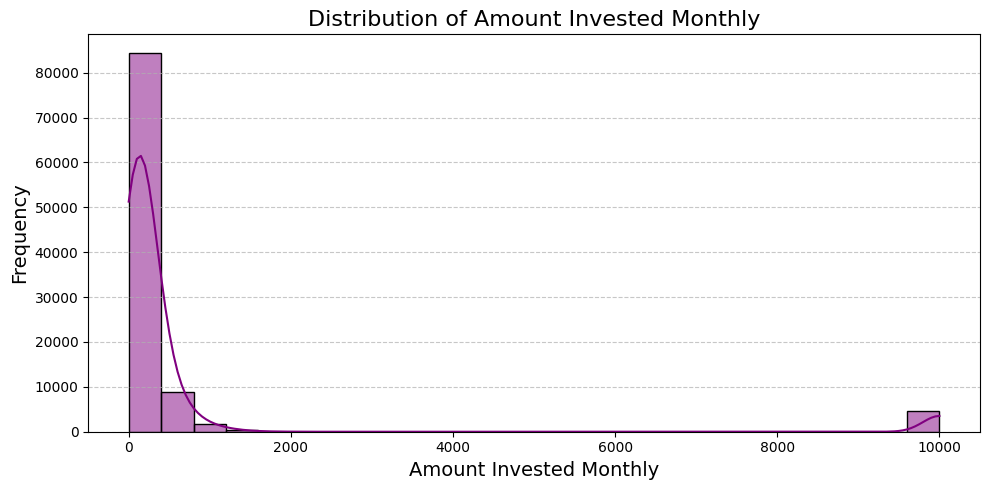

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="Amount_invested_monthly", bins=25, kde=True, color="purple")
plt.title("Distribution of Amount Invested Monthly", fontsize=16)
plt.xlabel("Amount Invested Monthly", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# **Payment_Behaviour**


In [103]:
df3.Payment_Behaviour.value_counts(dropna=False)

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [ ]:
# Replace the invalid value "!@#$%" with NaN
df3.loc[df3["Payment_Behaviour"] == "!@9#%8", "Payment_Behaviour"] = np.nan

# Group by 'customer_id' and fill missing values using forward-fill and backward-fill methods
df3["Payment_Behaviour"] = df3.groupby("Customer_ID")["Payment_Behaviour"].transform(
    lambda x: x.ffill().bfill()
)

In [105]:
# Check if there are any missing values left
missing_values_count = df3["Payment_Behaviour"].isna().sum()
print(f"Number of missing values in Payment_Behaviour: {missing_values_count}")

Number of missing values in Payment_Behaviour: 0


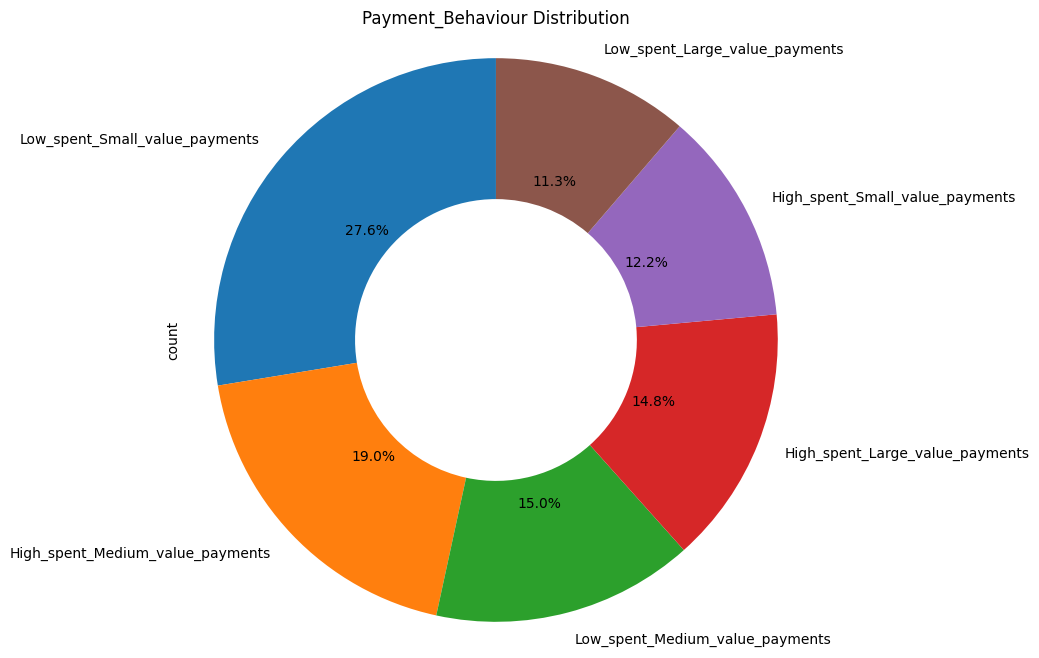

In [106]:
# Plot the distribution of payment_behaviour
plt.figure(figsize=(8, 8))
df3["Payment_Behaviour"].value_counts().plot.pie(
    labels=df3["Payment_Behaviour"].value_counts().index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.5),
)
plt.title("Payment_Behaviour Distribution")
plt.axis("equal")
plt.show()

# **Monthly_Balance**


In [107]:
df3.Monthly_Balance.value_counts(dropna=False)

Monthly_Balance
NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.673696                             1
Name: count, Length: 98793, dtype: int64

In [108]:
df3["Monthly_Balance"] = df3["Monthly_Balance"].replace(
    {"__-333333333333333__": "-333333333333333"}  # Replace invalid values
)
df3["Monthly_Balance"] = pd.to_numeric(
    df3["Monthly_Balance"], errors="coerce", downcast="float"
)

In [109]:
outlier_mask = df3["Monthly_Balance"] == -333333333333333
df3.loc[outlier_mask, "Monthly_Balance"] = df3.loc[outlier_mask, "Customer_ID"].map(
    df3.loc[~outlier_mask].groupby("Customer_ID")["Monthly_Balance"].mean()
)

In [110]:
df3["Monthly_Balance"] = df3.groupby("Customer_ID")["Monthly_Balance"].transform(
    lambda x: x.fillna(x.mean())
)

In [111]:
missing_count = df3["Monthly_Balance"].isna().sum()
print(f"Remaining Missing Values: {missing_count}")

Remaining Missing Values: 0


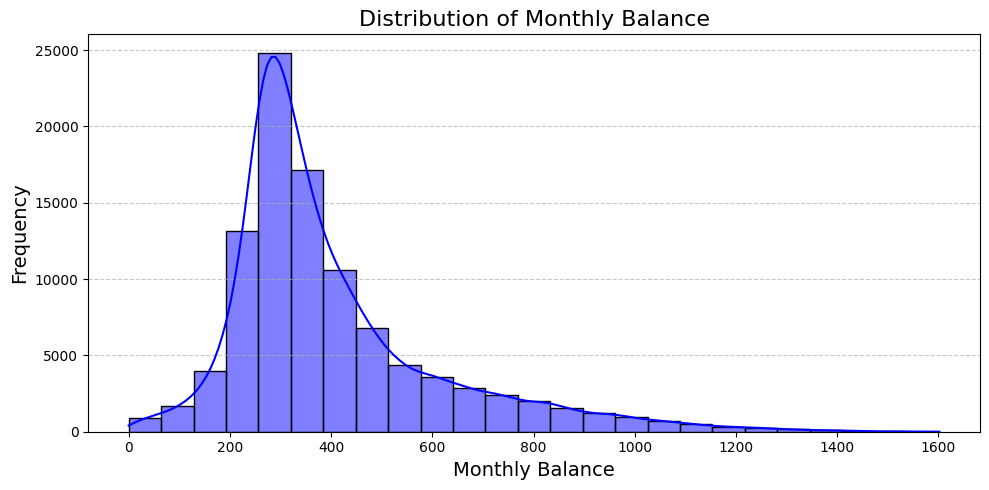

In [112]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="Monthly_Balance", bins=25, kde=True, color="blue")
plt.title("Distribution of Monthly Balance", fontsize=16)
plt.xlabel("Monthly Balance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# **Credit_Score**


In [113]:
df3.Credit_Score.value_counts(dropna=False)

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [ ]:
# Map the values to integers for easier processing
credit_score_mapping = {"Poor": 0, "Standard": 1, "Good": 2}
df3["Credit_Score"] = df3["Credit_Score"].map(credit_score_mapping).astype(int)

In [ ]:
# Confirm the change and check data types
print(df3["Credit_Score"].head())
print(df3.info())

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Payment_of_Min_Amount     100000 non-null  object 
 3   Amount_invested_monthly   100000 non-null  float64
 4   Payment_Behaviour         100000 non-null  object 
 5   Monthly_Balance           100000 non-null  float32
 6   Credit_Score              100000 non-null  int32  
dtypes: float32(1), float64(2), int32(1), object(3)
memory usage: 4.6+ MB
None


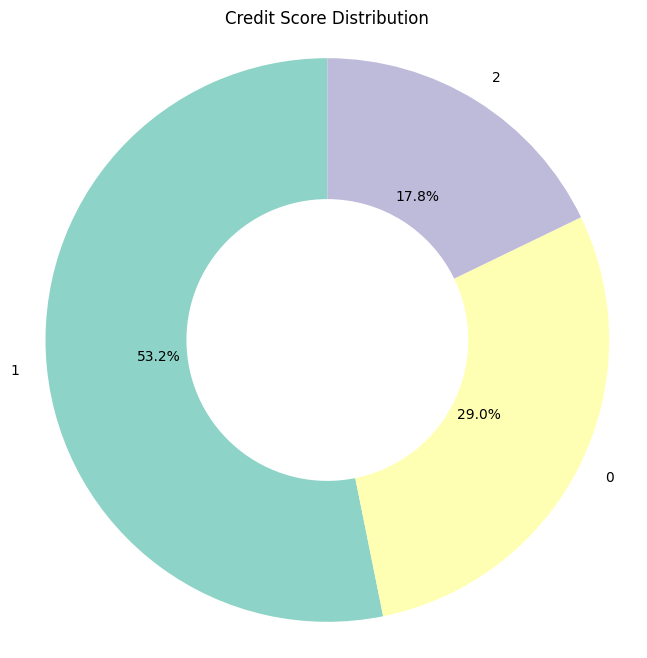

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    df3["Credit_Score"].value_counts(),
    labels=df3["Credit_Score"].value_counts().index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Set3.colors,
    wedgeprops=dict(width=0.5),
)
plt.title("Credit Score Distribution")
plt.axis("equal")
plt.show()

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Payment_of_Min_Amount     100000 non-null  object 
 3   Amount_invested_monthly   100000 non-null  float64
 4   Payment_Behaviour         100000 non-null  object 
 5   Monthly_Balance           100000 non-null  float32
 6   Credit_Score              100000 non-null  int32  
dtypes: float32(1), float64(2), int32(1), object(3)
memory usage: 4.6+ MB


# **DATA VISUALIZATION**


# Combining all cleaned data frames


In [ ]:
df = df1.join(df2.drop(columns=["Customer_ID"])).join(df3.drop(columns=["Customer_ID"]))
df = df.loc[:, ~df.columns.duplicated()]

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,49.574949,...,11.27,4.0,Good,809.98,26.822620,No,80.415295,High_spent_Small_value_payments,312.494080,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,49.574949,...,11.27,4.0,Good,809.98,31.944960,No,118.280222,Low_spent_Large_value_payments,284.629150,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,49.574949,...,11.27,4.0,Good,809.98,28.609352,No,81.699521,Low_spent_Medium_value_payments,331.209869,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,49.574949,...,6.27,4.0,Good,809.98,31.377862,No,199.458074,Low_spent_Small_value_payments,223.451309,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,49.574949,...,11.27,4.0,Good,809.98,24.797347,No,41.420153,High_spent_Medium_value_payments,341.489227,2


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93696 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        93696 non-null  object 
 1   Customer_ID               93696 non-null  object 
 2   Month                     93696 non-null  object 
 3   Name                      93696 non-null  object 
 4   Age                       93696 non-null  float64
 5   SSN                       93696 non-null  object 
 6   Occupation                93696 non-null  object 
 7   Annual_Income             93696 non-null  float64
 8   Monthly_Inhand_Salary     93696 non-null  float64
 9   Total_EMI_per_month       93696 non-null  float64
 10  Num_Bank_Accounts         93696 non-null  float64
 11  Num_Credit_Card           93696 non-null  float64
 12  Interest_Rate             93696 non-null  float64
 13  Num_of_Loan               93696 non-null  float64
 14  Type_of_Loa

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,93696.0,34.491248,10.070739,18.000000,26.000000,34.000000,42.000000,56.000000
Annual_Income,93696.0,51325.379381,38784.521256,7006.035000,19608.405000,37679.165000,72957.645000,179987.280000
Monthly_Inhand_Salary,93696.0,4267.449160,3227.816809,303.645417,1649.545000,3141.445833,6077.313333,15204.633333
Total_EMI_per_month,93696.0,106.264626,134.075640,0.000000,28.080674,65.173524,144.777468,4330.000000
Num_Bank_Accounts,93696.0,5.274451,2.602001,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,93696.0,5.473435,2.053794,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,93696.0,14.156079,8.659466,1.000000,7.000000,12.000000,20.000000,34.000000
Num_of_Loan,93696.0,3.431438,2.425032,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,93696.0,20.539970,14.657601,-5.000000,10.000000,17.000000,27.000000,67.000000
Num_of_Delayed_Payment,93696.0,13.096781,6.282876,0.000000,9.000000,13.000000,18.000000,28.000000


In [121]:
df.describe(include="object").T

,count,unique,top,freq
ID,93696,93696,0x1602,1
Customer_ID,93696,11712,CUS_0xd40,8
Month,93696,8,January,11712
Name,93696,9628,Langep,48
SSN,93696,11712,821-00-0265,8
Occupation,93696,15,Lawyer,6680
Type_of_Loan,93696,5717,[No Loan],11248
Credit_Mix,93696,3,Standard,42448
Payment_of_Min_Amount,93696,2,Yes,53128
Payment_Behaviour,93696,6,Low_spent_Small_value_payments,25576


# Attribute Correlations


In [ ]:
# Select only numerical columns including
numerical_cols = df.select_dtypes(
    include=["int32", "int64", "float32", "float64"]
).columns

# Compute Pearson correlation for numerical attributes with Credit Score
correlation = df[numerical_cols].corr(method="pearson")

print(correlation["Credit_Score"])

Age                         0.126390
Annual_Income               0.206665
Monthly_Inhand_Salary       0.203889
Total_EMI_per_month         0.016943
Num_Bank_Accounts          -0.383531
Num_Credit_Card            -0.404874
Interest_Rate              -0.481783
Num_of_Loan                -0.358442
Delay_from_due_date        -0.432566
Num_of_Delayed_Payment     -0.369807
Changed_Credit_Limit       -0.177804
Num_Credit_Inquiries       -0.431276
Outstanding_Debt           -0.384634
Credit_Utilization_Ratio    0.044562
Amount_invested_monthly     0.010975
Monthly_Balance             0.200936
Credit_Score                1.000000
Name: Credit_Score, dtype: float64


In [ ]:
categorical_features = [
    "Occupation",
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour",
]

for feature in categorical_features:
    print(f"Contingency Table for {feature}:")
    contingency_table = pd.crosstab(df[feature], df["Credit_Score"])
    print(contingency_table, "\n")

Contingency Table for Occupation:
Credit_Score      0     1     2
Occupation                     
Accountant     1822  3323  1183
Architect      1678  3514  1216
Developer      1768  3381  1187
Doctor         1649  3328  1143
Engineer       1888  3284  1252
Entrepreneur   1792  3225  1167
Journalist     1674  3274  1244
Lawyer         1781  3650  1249
Manager        1675  3184  1165
Mechanic       1857  3385  1094
Media_Manager  1582  3485  1237
Musician       1641  3160  1183
Scientist      1854  3296  1186
Teacher        1785  3164  1211
Writer         1713  3288   879 

Contingency Table for Credit_Mix:
Credit_Score      0      1      2
Credit_Mix                       
Bad           12533   8038    293
Good           4851  10685  14848
Standard       8775  31218   2455 

Contingency Table for Payment_of_Min_Amount:
Credit_Score               0      1      2
Payment_of_Min_Amount                     
No                      5439  19509  15620
Yes                    20720  30432   19

In [ ]:
results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df["Credit_Score"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({"Feature": feature, "P-Value": p})

results_df = pd.DataFrame(results)
print(results_df)

                 Feature        P-Value
0             Occupation   1.671976e-20
1             Credit_Mix   0.000000e+00
2  Payment_of_Min_Amount   0.000000e+00
3      Payment_Behaviour  8.867979e-275


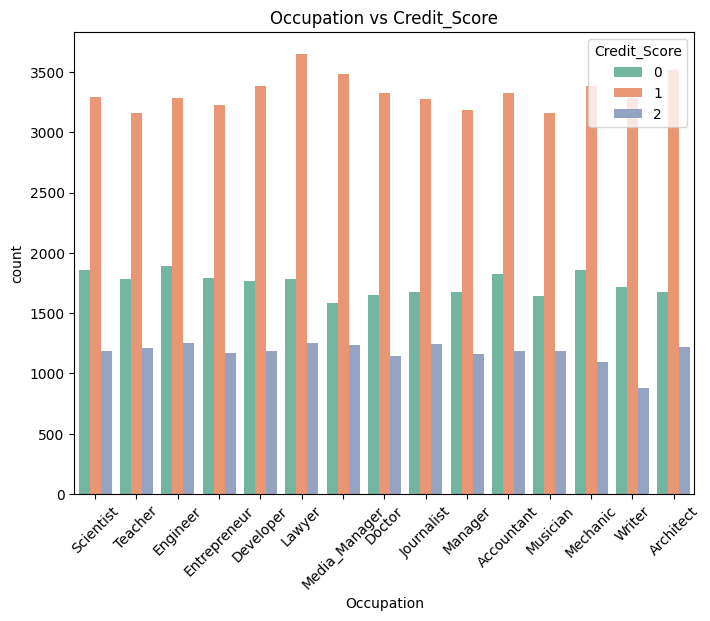

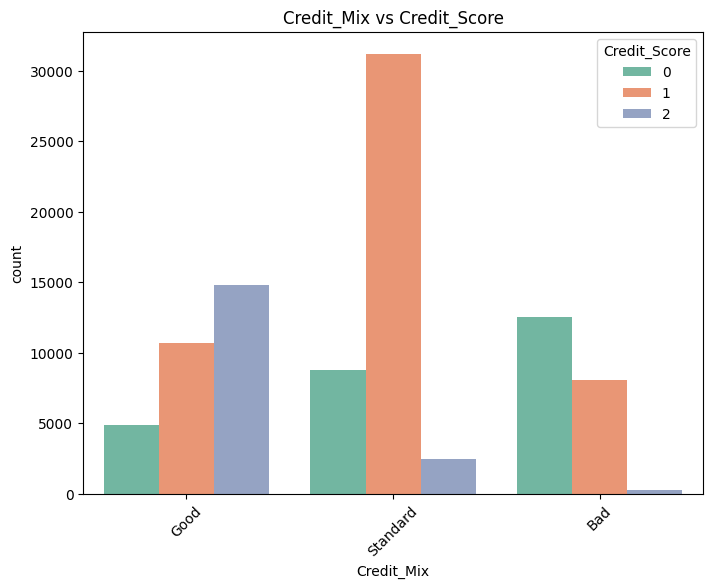

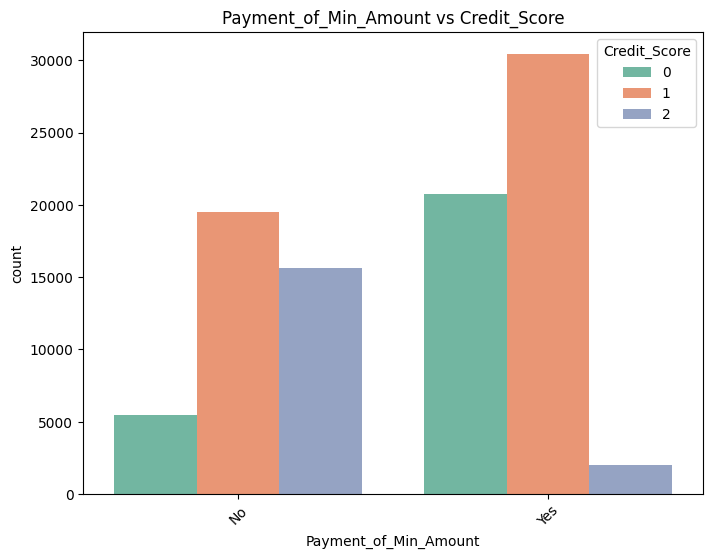

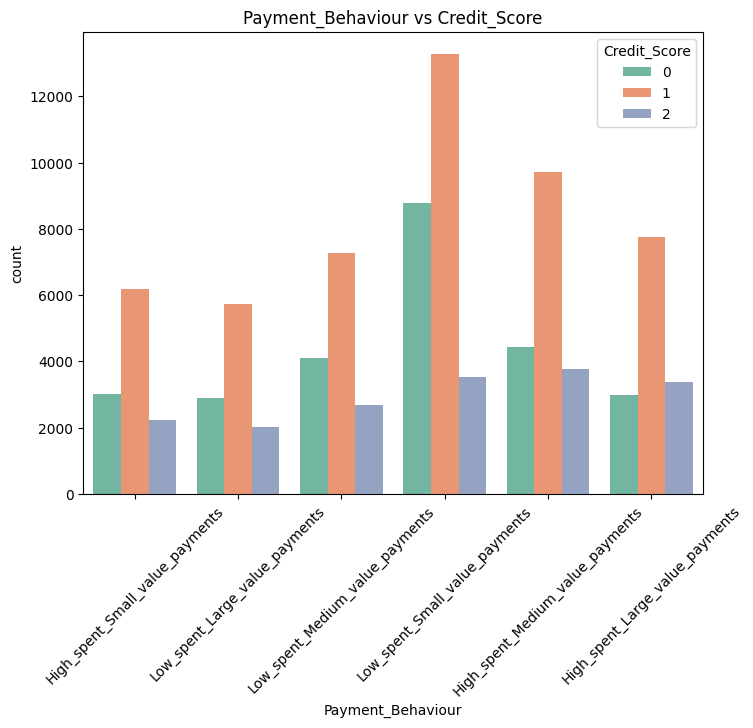

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue="Credit_Score", palette="Set2")
    plt.title(f"{feature} vs Credit_Score")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Get a list of all numerical columns in DataFrame
numerical_columns = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Total_EMI_per_month",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Monthly_Balance",
    "Credit_Score",
]

# Ensure df contains only numerical columns
df_numerical = df[numerical_columns]

# Now I can perform the correlation computation
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

                               Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.063876               0.062646   
Annual_Income             0.063876       1.000000               0.998239   
Monthly_Inhand_Salary     0.062646       0.998239               1.000000   
Total_EMI_per_month      -0.037426       0.436293               0.420645   
Num_Bank_Accounts        -0.148910      -0.280635              -0.279692   
Num_Credit_Card          -0.115635      -0.214263              -0.213117   
Interest_Rate            -0.169868      -0.297863              -0.297201   
Num_of_Loan              -0.167696      -0.252505              -0.251115   
Delay_from_due_date      -0.134412      -0.248159              -0.247369   
Num_of_Delayed_Payment   -0.138924      -0.285084              -0.284143   
Changed_Credit_Limit     -0.122904      -0.175646              -0.175612   
Num_Credit_Inquiries     -0.191749      -0.277419              -0.276810   
Outstanding_

In [ ]:
df_numerical.corr(method="spearman")["Credit_Score"]

Age                         0.115263
Annual_Income               0.204539
Monthly_Inhand_Salary       0.200731
Total_EMI_per_month        -0.082522
Num_Bank_Accounts          -0.382579
Num_Credit_Card            -0.385449
Interest_Rate              -0.474625
Num_of_Loan                -0.350654
Delay_from_due_date        -0.437152
Num_of_Delayed_Payment     -0.363431
Changed_Credit_Limit       -0.165666
Num_Credit_Inquiries       -0.429986
Outstanding_Debt           -0.423853
Credit_Utilization_Ratio    0.041077
Amount_invested_monthly     0.113734
Monthly_Balance             0.224724
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

In [ ]:
X = df_numerical.drop(columns=["Credit_Score"])
y = df_numerical["Credit_Score"]
mutual_info = mutual_info_classif(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(
    ascending=False
)
print(feature_importance)

Annual_Income               0.628460
Monthly_Inhand_Salary       0.628130
Outstanding_Debt            0.617398
Total_EMI_per_month         0.568676
Interest_Rate               0.172035
Delay_from_due_date         0.127733
Num_Credit_Inquiries        0.117311
Num_Credit_Card             0.111377
Changed_Credit_Limit        0.105937
Num_Bank_Accounts           0.104389
Num_of_Loan                 0.089175
Num_of_Delayed_Payment      0.088677
Monthly_Balance             0.033411
Amount_invested_monthly     0.024637
Age                         0.017114
Credit_Utilization_Ratio    0.000000
dtype: float64


In [ ]:
df_numerical.corr(method="kendall")["Credit_Score"]

Age                         0.090900
Annual_Income               0.160092
Monthly_Inhand_Salary       0.157073
Total_EMI_per_month        -0.065170
Num_Bank_Accounts          -0.319828
Num_Credit_Card            -0.324764
Interest_Rate              -0.388404
Num_of_Loan                -0.288944
Delay_from_due_date        -0.351307
Num_of_Delayed_Payment     -0.295774
Changed_Credit_Limit       -0.129999
Num_Credit_Inquiries       -0.351694
Outstanding_Debt           -0.327885
Credit_Utilization_Ratio    0.031962
Amount_invested_monthly     0.088743
Monthly_Balance             0.175409
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

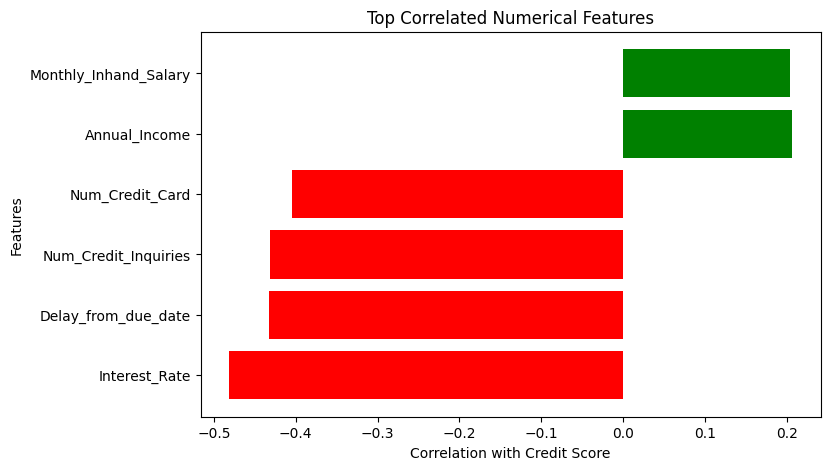

In [ ]:
# Correlation values
features = [
    "Interest_Rate",
    "Delay_from_due_date",
    "Num_Credit_Inquiries",
    "Num_Credit_Card",
    "Annual_Income",
    "Monthly_Inhand_Salary",
]
correlations = [-0.481783, -0.432566, -0.431276, -0.404874, 0.206665, 0.203889]

plt.figure(figsize=(8, 5))
plt.barh(
    features, correlations, color=["red" if c < 0 else "green" for c in correlations]
)
plt.xlabel("Correlation with Credit Score")
plt.ylabel("Features")
plt.title("Top Correlated Numerical Features")
plt.show()

# **Feature Engineering and Model Preperation**


**Encoding categorical attributes credit mix, payment behavior, payment of minimum amount**


In [ ]:
print(df["Credit_Mix"].unique())

In [ ]:
credit_mix_mapping = {"Good": 2, "Standard": 1, "Bad": 0}
df["Credit_Mix"] = df["Credit_Mix"].map(credit_mix_mapping)

In [ ]:
print(df["Credit_Mix"].isna().sum())

In [ ]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Occupation"], axis=1)

In [ ]:
payment_behaviour_mapping = {
    "High_spent_Large_value_payments": 6,
    "High_spent_Medium_value_payments": 5,
    "High_spent_Small_value_payments": 4,
    "Low_spent_Large_value_payments": 3,
    "Low_spent_Medium_value_payments": 2,
    "Low_spent_Small_value_payments": 1,
}
df["Payment_Behaviour"] = (
    df["Payment_Behaviour"].map(payment_behaviour_mapping).astype(int)
)

In [ ]:
payment_min_amount_mapping = {"Yes": 1, "No": 0}
df["Payment_of_Min_Amount"] = (
    df["Payment_of_Min_Amount"].map(payment_min_amount_mapping).astype(int)
)

In [ ]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
}

df["Month"] = df["Month"].map(month_mapping)
print(df["Month"].unique())
print(df.isna().sum())  # Ensure no missing values

In [ ]:
def find_outliers(df):
    """Identify outliers in numerical columns using the IQR method."""

    # Dictionary to store detected outliers
    outlier_dict = {}

    num_cols = df.select_dtypes(include=["number"])

    for col in num_cols.columns:
        # Compute Q1 (25th percentile) and Q3 (75th percentile)
        q1, q3 = num_cols[col].quantile([0.25, 0.75])

        # Compute interquartile range (IQR)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = num_cols[
            (num_cols[col] < lower_bound) | (num_cols[col] > upper_bound)
        ][col]

        if not outliers.empty:
            outlier_dict[col] = outliers

    return outlier_dict


outlier_results = find_outliers(df)

for col, values in outlier_results.items():
    print(f"Outliers detected in '{col}':")
    print(values)
    print("-" * 40)

# If no outliers were found
if not outlier_results:
    print("No significant outliers detected.")

**Numerical Feature Scaling, splitting data and Define Features (X) and Target (y)**


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Credit_Score"])  # Exclude target column
y = df["Credit_Score"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
print(df.dtypes)  # Check if any categorical columns remain

In [ ]:
# original_columns = X_train.columns.tolist()  # Save these somewhere for later use

In [ ]:
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_columns)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Define robust scaling columns (high outliers)
robust_columns = [
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Total_EMI_per_month",
    "Delay_from_due_date",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Monthly_Balance",
]

# Define standard scaling columns (normally distributed)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ("standard", StandardScaler(), standard_columns),
        ("robust", RobustScaler(), robust_columns),
    ]
)

# Apply to training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(type(X_train_scaled))

In [ ]:
print("Scaled array shape:", X_train_scaled.shape)

In [ ]:
# List of features I want to remove (from my feature importance results) change this as needed for the model
features_to_drop = [
    "Amount_invested_monthly",
    "Payment_Behaviour",
    "Changed_Credit_Limit",
    "Monthly_Balance",
    "Month",
    "Num_Credit_Inquiries",
]

# Create reduced DataFrames for training and testing
X_train_scaled_reduced = X_train_scaled_df.drop(
    columns=features_to_drop, errors="ignore"
)
X_test_scaled_reduced = X_test_scaled_df.drop(columns=features_to_drop, errors="ignore")

print("Reduced Training Shape:", X_train_scaled_reduced.shape)
print("Reduced Testing Shape:", X_test_scaled_reduced.shape)


**Handle Class Imbalance**


In [ ]:
# Ensure y_train is an array
y_train = np.array(y_train)

class_weights_array = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)

class_weights = {
    int(label): weight for label, weight in zip(np.unique(y_train), class_weights_array)
}

print("Computed Class Weights:", class_weights)

# **Logisitc Regression Baseline **


In [ ]:
# Initialize Logistic Regression (Pre-SLT)
log_model_pre = LogisticRegression(class_weight=class_weights, random_state=42)

log_model_pre.fit(X_train_scaled, y_train)

y_pred_log_pre = log_model_pre.predict(X_test_scaled)

print("=== Logistic Regression (Pre-SLT) - Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log_pre))
print("Classification Report:\n", classification_report(y_test, y_pred_log_pre))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_pre))

**Confusion Matrix (as a Heatmap)**


In [ ]:
cm_log_pre = confusion_matrix(y_test, y_pred_log_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_pre, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Pre-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**ROC Curve (with AUC)**


In [ ]:
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)

y_proba_log_pre = log_model_pre.predict_proba(X_test_scaled)

fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

plt.figure(figsize=(8, 6))

# 5. Compute and plot the ROC curve for each class separately
for i, cls in enumerate(classes):
    fpr_dict[cls], tpr_dict[cls], _ = roc_curve(y_test_bin[:, i], y_proba_log_pre[:, i])
    roc_auc_dict[cls] = auc(fpr_dict[cls], tpr_dict[cls])

    plt.plot(
        fpr_dict[cls],
        tpr_dict[cls],
        label=f"Class {cls} (AUC = {roc_auc_dict[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--", label="No Discrimination")

# Label the axes and title
plt.title("ROC Curve - Logistic Regression (Pre-SLT) [Multi-class OvR]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
all_auc = list(roc_auc_dict.values())
macro_auc = np.mean(all_auc)
print(f"Macro-Averaged AUC: {macro_auc:.2f}")

**Learning Curve (Training vs. Validation Accuracy)**


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=log_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Accuracy")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.plot(train_sizes, val_mean, "o-", color="green", label="Validation Accuracy")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="green"
)
plt.title("Learning Curve - Logistic Regression (Pre-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Cross-Validated Scores (Per Fold)**


In [ ]:
cv_scores_log_pre = cross_val_score(
    estimator=log_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)

print("=== Logistic Regression (Pre-SLT) - Cross-Validation Scores ===")
print("CV Accuracy per fold:", cv_scores_log_pre)
print("Mean CV Accuracy:", np.mean(cv_scores_log_pre))
print("Std CV Accuracy:", np.std(cv_scores_log_pre))

# **Logistic Regression with SLT**


**Cross-Validation & Basic Evaluation**


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_model_post = LogisticRegression(
    class_weight=class_weights, solver="liblinear", penalty="l2", C=1.0, random_state=42
)

post_cv_scores = cross_val_score(
    estimator=log_model_post,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)

print(
    "Post-SLT Logistic Regression - Cross-Validation Accuracy Scores:", post_cv_scores
)
print("Mean CV Accuracy (Post-SLT):", post_cv_scores.mean())

# Retrain on the entire training set and evaluate on the test set
log_model_post.fit(X_train_scaled, y_train)
y_pred_test = log_model_post.predict(X_test_scaled)

print("\nFinal Test Accuracy (Post-SLT):", accuracy_score(y_test, y_pred_test))
print("Classification Report (Post-SLT):\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix (Post-SLT):\n", confusion_matrix(y_test, y_pred_test))

**Hyperparameter Tuning (Grid search)**


In [ ]:
from sklearn.model_selection import GridSearchCV

# Reinitialize model for grid search
log_model_grid = LogisticRegression(
    class_weight=class_weights, solver="liblinear", random_state=42
)

param_grid = {
    "penalty": ["l1", "l2"],  # Compare L1 vs. L2
    "C": [0.01, 0.1, 1, 10, 100],  # Range of regularization strengths
}

grid_search = GridSearchCV(
    estimator=log_model_grid,
    param_grid=param_grid,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1,
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters (Post-SLT):", grid_search.best_params_)
print("Best CV Accuracy (Post-SLT):", grid_search.best_score_)

# Use the best estimator from grid search as the final post-SLT model
best_log_model = grid_search.best_estimator_
y_pred_test = best_log_model.predict(X_test_scaled)

print("\nTest Accuracy (Post-SLT Best Model):", accuracy_score(y_test, y_pred_test))
print(
    "Classification Report (Post-SLT Best Model):\n",
    classification_report(y_test, y_pred_test),
)
print(
    "Confusion Matrix (Post-SLT Best Model):\n", confusion_matrix(y_test, y_pred_test)
)

**Updated Confusion Matrix (Post-SLT)**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_post = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_post, annot=True, fmt="d", cmap="Blues")
plt.title("Updated Confusion Matrix - Logistic Regression (Post-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Updated ROC Curve (Post-SLT)**


In [ ]:
classes = np.unique(y_test)
n_classes = len(classes)

# Binarize the true labels for multi-class ROC evaluation
y_test_bin = label_binarize(y_test, classes=classes)

y_proba_post = best_log_model.predict_proba(X_test_scaled)

fpr_post = {}
tpr_post = {}
roc_auc_post = {}

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr_post[cls], tpr_post[cls], _ = roc_curve(y_test_bin[:, i], y_proba_post[:, i])
    roc_auc_post[cls] = auc(fpr_post[cls], tpr_post[cls])
    plt.plot(
        fpr_post[cls],
        tpr_post[cls],
        label=f"Class {cls} (AUC = {roc_auc_post[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Updated ROC Curve - Logistic Regression (Post-SLT) [Multi-class]")
plt.legend(loc="lower right")
plt.show()

In [ ]:
macro_auc = np.mean(list(roc_auc_post.values()))
print(f"Macro-Averaged AUC (Post-SLT): {macro_auc:.2f}")

**Updated Learning Curve (Post-SLT)**


In [ ]:
# Compute learning curve using the post-SLT best model
train_sizes_post, train_scores_post, val_scores_post = learning_curve(
    estimator=best_log_model,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_post = np.mean(train_scores_post, axis=1)
train_std_post = np.std(train_scores_post, axis=1)
val_mean_post = np.mean(val_scores_post, axis=1)
val_std_post = np.std(val_scores_post, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(
    train_sizes_post,
    train_mean_post,
    "o-",
    color="blue",
    label="Training Accuracy (Post-SLT)",
)
plt.fill_between(
    train_sizes_post,
    train_mean_post - train_std_post,
    train_mean_post + train_std_post,
    alpha=0.2,
    color="blue",
)
plt.plot(
    train_sizes_post,
    val_mean_post,
    "o-",
    color="green",
    label="Validation Accuracy (Post-SLT)",
)
plt.fill_between(
    train_sizes_post,
    val_mean_post - val_std_post,
    val_mean_post + val_std_post,
    alpha=0.2,
    color="green",
)
plt.title("Updated Learning Curve - Logistic Regression (Post-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Comparing L1 and L2 Regularization**


In [ ]:
if best_log_model.penalty == "l1":
    print("\nModel Coefficients with L1:")
    print(best_log_model.coef_)

if best_log_model.penalty == "l2":
    print("\nModel Coefficients with L2:")
    print(best_log_model.coef_)

# **Decision Tree Classifier**


In [ ]:
tree_model_pre = DecisionTreeClassifier(
    class_weight=class_weights,
    max_depth=5,  # Example
    random_state=42,
)

tree_model_pre.fit(X_train_scaled, y_train)

y_pred_tree_pre = tree_model_pre.predict(X_test_scaled)

# Print basic accuracy and classification report
print("=== Decision Tree (Pre-SLT) - Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_pre))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_pre))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_pre))

**Confusion Matrix (Heatmap)**


In [ ]:
cm_tree_pre = confusion_matrix(y_test, y_pred_tree_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_pre, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree (Pre-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**ROC Curve (One-vs-Rest for Multi-Class)**


In [ ]:
# Identify unique classes
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)

y_proba_tree_pre = tree_model_pre.predict_proba(X_test_scaled)

fpr_pre = {}
tpr_pre = {}
roc_auc_pre = {}

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr_pre[cls], tpr_pre[cls], _ = roc_curve(y_test_bin[:, i], y_proba_tree_pre[:, i])
    roc_auc_pre[cls] = auc(fpr_pre[cls], tpr_pre[cls])
    plt.plot(
        fpr_pre[cls], tpr_pre[cls], label=f"Class {cls} (AUC = {roc_auc_pre[cls]:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - Decision Tree (Pre-SLT) [Multi-class]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
macro_auc_pre = np.mean(list(roc_auc_pre.values()))
print(f"Macro-Averaged AUC (Pre-SLT): {macro_auc_pre:.2f}")

**Learning Curve (Training vs. Validation)**


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=tree_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Accuracy")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, valid_mean, "o-", color="green", label="Validation Accuracy")
plt.fill_between(
    train_sizes,
    valid_mean - valid_std,
    valid_mean + valid_std,
    color="green",
    alpha=0.2,
)
plt.title("Learning Curve - Decision Tree (Pre-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Cross-Validated Scores (Per Fold)**


In [ ]:
cv_scores_tree_pre = cross_val_score(
    estimator=tree_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)

print("Decision Tree (Pre-SLT) - Per-Fold CV Accuracy:", cv_scores_tree_pre)
print("Mean CV Accuracy (Pre-SLT):", np.mean(cv_scores_tree_pre))
print("Std CV Accuracy (Pre-SLT):", np.std(cv_scores_tree_pre))

# **Decision Tree Classifier with SLT**


**Grid Search for Post-SLT Decision Tree**


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define grid search parameter grid (no None for max_depth so it doesn't go too deep and overfit)
param_grid_tree_post = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

tree_model_post_base = DecisionTreeClassifier(
    class_weight=class_weights, random_state=42
)

grid_search_tree_post = GridSearchCV(
    estimator=tree_model_post_base,
    param_grid=param_grid_tree_post,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1,
    return_train_score=True,
)

grid_search_tree_post.fit(X_train_scaled, y_train)

print("Best Parameters (Post-SLT):", grid_search_tree_post.best_params_)

cv_results = grid_search_tree_post.cv_results_
for i, params in enumerate(cv_results["params"]):
    print("Params:", params)
    # Print all fold scores
    scores_per_fold = [cv_results[f"split{fold}_test_score"][i] for fold in range(5)]
    print("CV Scores (per fold):", scores_per_fold)
    print("Mean Score:", cv_results["mean_test_score"][i])
    print("-" * 50)

tree_model_post = grid_search_tree_post.best_estimator_

cv_scores_tree_post = cross_val_score(
    estimator=tree_model_post,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)
print("\nBest Model - CV Accuracy per fold (Post-SLT):", cv_scores_tree_post)
print("Mean CV Accuracy (Post-SLT):", np.mean(cv_scores_tree_post))

In [ ]:
print("=== Decision Tree (Pre-SLT) - Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_post))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_post))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_post))

**Updated Confusion Matrix (Post-SLT)**


In [ ]:
y_pred_tree_post = tree_model_post.predict(X_test_scaled)

cm_tree_post = confusion_matrix(y_test, y_pred_tree_post)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_post, annot=True, fmt="d", cmap="Blues")
plt.title("Updated Confusion Matrix - Decision Tree (Post-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Enhanced ROC Curve (Post-SLT) for Multi-Class**


In [ ]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_proba_tree_post = tree_model_post.predict_proba(X_test_scaled)

fpr_post = {}
tpr_post = {}
roc_auc_post = {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr_post[cls], tpr_post[cls], _ = roc_curve(
        y_test_bin[:, i], y_proba_tree_post[:, i]
    )
    roc_auc_post[cls] = auc(fpr_post[cls], tpr_post[cls])
    plt.plot(
        fpr_post[cls],
        tpr_post[cls],
        label=f"Class {cls} (AUC = {roc_auc_post[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("Enhanced ROC Curve - Decision Tree (Post-SLT) [Multi-class]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
macro_auc_post = np.mean(list(roc_auc_post.values()))
print(f"Macro-Averaged AUC (Post-SLT): {macro_auc_post:.2f}")

**Improved Learning Curve (Post-SLT)**


In [ ]:
train_sizes_post, train_scores_post, valid_scores_post = learning_curve(
    estimator=tree_model_post,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)

train_mean_post = np.mean(train_scores_post, axis=1)
train_std_post = np.std(train_scores_post, axis=1)
valid_mean_post = np.mean(valid_scores_post, axis=1)
valid_std_post = np.std(valid_scores_post, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(
    train_sizes_post,
    train_mean_post,
    "o-",
    color="blue",
    label="Training Accuracy (Post-SLT)",
)
plt.fill_between(
    train_sizes_post,
    train_mean_post - train_std_post,
    train_mean_post + train_std_post,
    alpha=0.2,
    color="blue",
)
plt.plot(
    train_sizes_post,
    valid_mean_post,
    "o-",
    color="green",
    label="Validation Accuracy (Post-SLT)",
)
plt.fill_between(
    train_sizes_post,
    valid_mean_post - valid_std_post,
    valid_mean_post + valid_std_post,
    alpha=0.2,
    color="green",
)
plt.title("Improved Learning Curve - Decision Tree (Post-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# **Random Forest Classifier**


**Train the Baseline Random Forest (Pre-SLT) and Basic Evaluation**


In [ ]:
rf_model_pre = RandomForestClassifier(
    class_weight=class_weights,
    n_estimators=100,  # example
    random_state=42,
)

rf_model_pre.fit(X_train_scaled, y_train)

y_pred_rf_pre = rf_model_pre.predict(X_test_scaled)

print("=== Random Forest (Pre-SLT) - Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_pre))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_pre))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_pre))


**Confusion Matrix (Heatmap)**


In [ ]:
cm_rf_pre = confusion_matrix(y_test, y_pred_rf_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_pre, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Pre-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Multi-Class ROC Curve (One-vs-Rest)**


In [ ]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_proba_rf_pre = rf_model_pre.predict_proba(X_test_scaled)

fpr_rf_pre = {}
tpr_rf_pre = {}
roc_auc_rf_pre = {}

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr_rf_pre[cls], tpr_rf_pre[cls], _ = roc_curve(
        y_test_bin[:, i], y_proba_rf_pre[:, i]
    )
    roc_auc_rf_pre[cls] = auc(fpr_rf_pre[cls], tpr_rf_pre[cls])
    plt.plot(
        fpr_rf_pre[cls],
        tpr_rf_pre[cls],
        label=f"Class {cls} (AUC = {roc_auc_rf_pre[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - Random Forest (Pre-SLT) [Multi-class]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
macro_auc_rf_pre = np.mean(list(roc_auc_rf_pre.values()))
print(f"Macro-Averaged AUC (Pre-SLT): {macro_auc_rf_pre:.2f}")

**Learning Curve (Training vs. Validation)**


In [ ]:
from sklearn.model_selection import learning_curve, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes_rf_pre, train_scores_rf_pre, valid_scores_rf_pre = learning_curve(
    estimator=rf_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)

train_mean_rf_pre = np.mean(train_scores_rf_pre, axis=1)
train_std_rf_pre = np.std(train_scores_rf_pre, axis=1)
valid_mean_rf_pre = np.mean(valid_scores_rf_pre, axis=1)
valid_std_rf_pre = np.std(valid_scores_rf_pre, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(
    train_sizes_rf_pre, train_mean_rf_pre, "o-", color="blue", label="Training Accuracy"
)
plt.fill_between(
    train_sizes_rf_pre,
    train_mean_rf_pre - train_std_rf_pre,
    train_mean_rf_pre + train_std_rf_pre,
    alpha=0.2,
    color="blue",
)
plt.plot(
    train_sizes_rf_pre,
    valid_mean_rf_pre,
    "o-",
    color="green",
    label="Validation Accuracy",
)
plt.fill_between(
    train_sizes_rf_pre,
    valid_mean_rf_pre - valid_std_rf_pre,
    valid_mean_rf_pre + valid_std_rf_pre,
    alpha=0.2,
    color="green",
)
plt.title("Learning Curve - Random Forest (Pre-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Feature Importance Plot (Built-In Measures)**


In [ ]:
feature_importances_rf_pre = rf_model_pre.feature_importances_

feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df_rf_pre = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances_rf_pre}
)

importance_df_rf_pre = importance_df_rf_pre.sort_values(
    by="Importance", ascending=False
)

plt.figure(figsize=(8, 6))
plt.barh(
    importance_df_rf_pre["Feature"],
    importance_df_rf_pre["Importance"],
    color="royalblue",
)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest (Pre-SLT)")
plt.show()

In [ ]:
display(importance_df_rf_pre)

**Cross-Validated Scores (Per-Fold)**


In [ ]:
cv_scores_rf_pre = cross_val_score(
    estimator=rf_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)

print("Random Forest (Pre-SLT) - CV Accuracy per fold:", cv_scores_rf_pre)
print("Mean CV Accuracy (Pre-SLT):", np.mean(cv_scores_rf_pre))
print("Std CV Accuracy (Pre-SLT):", np.std(cv_scores_rf_pre))

# **Random Forest Classifier with SLT**


**Grid Search with Post-SLT Configuration and CV on Tuned Model**


In [ ]:
final_rf_params = {
    "max_depth": 24,
    "min_samples_leaf": 2,
    "min_samples_split": 7,
    "n_estimators": 124,
}

# Initialize the final RFC model using the above parameters I got from the grid search
rf_final = RandomForestClassifier(
    max_depth=final_rf_params["max_depth"],
    min_samples_leaf=final_rf_params["min_samples_leaf"],
    min_samples_split=final_rf_params["min_samples_split"],
    n_estimators=final_rf_params["n_estimators"],
    class_weight=class_weights,
    random_state=42,
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_final = cross_val_score(
    estimator=rf_final,
    X=X_train_scaled_reduced,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)
print("RFC Final Model CV Accuracy per fold:", cv_scores_final)
print("RFC Final Model Mean CV Accuracy:", np.mean(cv_scores_final))

rf_final.fit(X_train_scaled_reduced, y_train)
y_pred_final = rf_final.predict(X_test_scaled_reduced)
test_accuracy = accuracy_score(y_test, y_pred_final)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title("Updated Confusion Matrix - Final RFC Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Enhanced ROC Curve for Final RFC Model
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba_final = rf_final.predict_proba(X_test_scaled_reduced)

fpr_final = {}
tpr_final = {}
roc_auc_final = {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr_final[cls], tpr_final[cls], _ = roc_curve(y_test_bin[:, i], y_proba_final[:, i])
    roc_auc_final[cls] = auc(fpr_final[cls], tpr_final[cls])
    plt.plot(
        fpr_final[cls],
        tpr_final[cls],
        label=f"Class {cls} (AUC = {roc_auc_final[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("Enhanced ROC Curve - Final RFC Model (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

macro_auc_final = np.mean(list(roc_auc_final.values()))
print(f"Macro-Averaged AUC (Final RFC): {macro_auc_final:.2f}")

# Updated Learning Curve
train_sizes_final, train_scores_final, valid_scores_final = learning_curve(
    estimator=rf_final,
    X=X_train_scaled_reduced,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)
train_mean_final = np.mean(train_scores_final, axis=1)
train_std_final = np.std(train_scores_final, axis=1)
valid_mean_final = np.mean(valid_scores_final, axis=1)
valid_std_final = np.std(valid_scores_final, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(
    train_sizes_final, train_mean_final, "o-", color="blue", label="Training Accuracy"
)
plt.fill_between(
    train_sizes_final,
    train_mean_final - train_std_final,
    train_mean_final + train_std_final,
    alpha=0.2,
    color="blue",
)
plt.plot(
    train_sizes_final,
    valid_mean_final,
    "o-",
    color="green",
    label="Validation Accuracy",
)
plt.fill_between(
    train_sizes_final,
    valid_mean_final - valid_std_final,
    valid_mean_final + valid_std_final,
    alpha=0.2,
    color="green",
)
plt.title("Learning Curve - Final RFC Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# Comparative Feature Importance via Drop-Column Analysis
# Compute the baseline accuracy on the test set
baseline_accuracy_final = rf_final.score(X_test_scaled_reduced, y_test)

# Drop each feature one at a time (using .iloc) and measure the impact on accuracy
feature_importance_final = {}

for i, feature in enumerate(X_train_scaled_reduced.columns):
    X_test_temp = X_test_scaled_reduced.copy()  # Copy the DataFrame
    X_test_temp.iloc[:, i] = 0  # Zero out the i-th column using .iloc
    temp_accuracy = rf_final.score(X_test_temp, y_test)
    feature_importance_final[feature] = baseline_accuracy_final - temp_accuracy

importance_df_final = pd.DataFrame(
    sorted(feature_importance_final.items(), key=lambda x: x[1], reverse=True),
    columns=["Feature", "Importance"],
)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df_final, palette="coolwarm")
plt.gca().invert_yaxis()  # highest importance at the top
plt.title("Comparative Feature Importance (Drop-Column) - Final RFC Model")
plt.xlabel("Drop in Accuracy")
plt.ylabel("Feature")
plt.show()

# Performance Metrics Summary Table (Comparison)
pre_rf_accuracy = 0.8107
pre_rf_cv_mean = 0.8047
pre_rf_macro_auc = 0.93

post_rf_accuracy = test_accuracy
post_rf_cv_mean = np.mean(cv_scores_final)
post_rf_macro_auc = macro_auc_final

metrics_dict_final = {
    "Accuracy": [pre_rf_accuracy, post_rf_accuracy],
    "CV Mean Accuracy": [pre_rf_cv_mean, post_rf_cv_mean],
    "Macro-AUC": [pre_rf_macro_auc, post_rf_macro_auc],
}

rf_metrics_summary_df = pd.DataFrame(
    metrics_dict_final, index=["Pre-SLT", "Post-SLT"]
).T
print("=== Performance Metrics Comparison: Final RFC Model ===")
print(rf_metrics_summary_df)

# **XGBClassifier Pre SLT**


In [ ]:
xgb_model_pre = XGBClassifier(
    scale_pos_weight=class_weights[2],
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42,
)

xgb_model_pre.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model_pre.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Test Accuracy (Pre-SLT):", test_accuracy)
print("Classification Report (Pre-SLT):\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix (Pre-SLT):\n", confusion_matrix(y_test, y_pred_xgb))

# Confusion Matrix as Heatmap
# -------------------------------
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Pre-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve with Computed AUC (Multi-class OvR)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba_xgb = xgb_model_pre.predict_proba(X_test_scaled)

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])
    plt.plot(fpr[cls], tpr[cls], label=f"Class {cls} (AUC = {roc_auc[cls]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - XGBoost (Pre-SLT) [Multi-class OvR]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-Averaged AUC (Pre-SLT): {macro_auc:.2f}")

# Learning Curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=xgb_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Accuracy")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue"
)
plt.plot(train_sizes, valid_mean, "o-", color="green", label="Validation Accuracy")
plt.fill_between(
    train_sizes,
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color="green",
)
plt.title("Learning Curve - XGBoost (Pre-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# Cross-Validated Scores per Fold
cv_scores_xgb = cross_val_score(
    estimator=xgb_model_pre,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)
print("XGBoost (Pre-SLT) - CV Accuracy Scores per fold:", cv_scores_xgb)
print("Mean CV Accuracy (Pre-SLT):", np.mean(cv_scores_xgb))

# Performance Metrics Summary Table
metrics = {
    "Test Accuracy": [test_accuracy],
    "CV Mean Accuracy": [np.mean(cv_scores_xgb)],
    "Macro-AUC": [macro_auc],
}
metrics_df = pd.DataFrame(metrics, index=["XGBoost_PreSLT"])
print("=== Performance Metrics Summary - XGBoost (Pre-SLT) ===")
print(metrics_df)


In [ ]:
# Feature Importance Plot (Internal XGBoost Scores)
feature_importances = xgb_model_pre.feature_importances_

feature_names = X_train_scaled_df.columns

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - XGBoost (Pre-SLT)")
plt.bar(range(len(indices)), feature_importances[indices], color="red", align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# **XGBClassifier with SLT**


In [ ]:
# Parameter Tuning via Grid Search
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_xgb_post = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [1, 1.5, 2, 3],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 125, 150],
}

xgb_model_post_base = XGBClassifier(
    use_label_encoder=False, eval_metric="mlogloss", random_state=42
)

grid_search_xgb_post = GridSearchCV(
    estimator=xgb_model_post_base,
    param_grid=param_grid_xgb_post,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1,
    verbose=1,
)

grid_search_xgb_post.fit(X_train_scaled, y_train)
print("Best Parameters (Post-SLT, XGB):", grid_search_xgb_post.best_params_)
print("Best CV Accuracy (Post-SLT, XGB):", grid_search_xgb_post.best_score_)

xgb_model_post = grid_search_xgb_post.best_estimator_

# Cross-Validation Scores (Per-Fold)
cv_scores_xgb_post = cross_val_score(
    estimator=xgb_model_post,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
)
print("\nXGBoost (Post-SLT) - CV Accuracy Scores per fold:", cv_scores_xgb_post)
print("Mean CV Accuracy (Post-SLT):", np.mean(cv_scores_xgb_post))

y_pred_xgb_post = xgb_model_post.predict(X_test_scaled)
test_accuracy_xgb_post = accuracy_score(y_test, y_pred_xgb_post)
print("\nXGBoost Test Accuracy (Post-SLT):", test_accuracy_xgb_post)
print(
    "\nClassification Report (Post-SLT):\n",
    classification_report(y_test, y_pred_xgb_post),
)

cm_xgb_post = confusion_matrix(y_test, y_pred_xgb_post)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_post, annot=True, fmt="d", cmap="Blues")
plt.title("Updated Confusion Matrix - XGBoost (Post-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Enhanced ROC Curve
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba_xgb_post = xgb_model_post.predict_proba(X_test_scaled)

fpr_post = {}
tpr_post = {}
roc_auc_post = {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr_post[cls], tpr_post[cls], _ = roc_curve(
        y_test_bin[:, i], y_proba_xgb_post[:, i]
    )
    roc_auc_post[cls] = auc(fpr_post[cls], tpr_post[cls])
    plt.plot(
        fpr_post[cls],
        tpr_post[cls],
        label=f"Class {cls} (AUC = {roc_auc_post[cls]:.2f})",
    )
plt.plot([0, 1], [0, 1], "k--")
plt.title("Enhanced ROC Curve - XGBoost (Post-SLT)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

macro_auc_xgb_post = np.mean(list(roc_auc_post.values()))
print(f"Macro-Averaged AUC (Post-SLT): {macro_auc_xgb_post:.2f}")

# Updated Learning Curve
train_sizes_xgb_post, train_scores_xgb_post, valid_scores_xgb_post = learning_curve(
    estimator=xgb_model_post,
    X=X_train_scaled,
    y=y_train,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
)
train_mean_xgb_post = np.mean(train_scores_xgb_post, axis=1)
train_std_xgb_post = np.std(train_scores_xgb_post, axis=1)
valid_mean_xgb_post = np.mean(valid_scores_xgb_post, axis=1)
valid_std_xgb_post = np.std(valid_scores_xgb_post, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(
    train_sizes_xgb_post,
    train_mean_xgb_post,
    "o-",
    color="blue",
    label="Training Accuracy",
)
plt.fill_between(
    train_sizes_xgb_post,
    train_mean_xgb_post - train_std_xgb_post,
    train_mean_xgb_post + train_std_xgb_post,
    alpha=0.2,
    color="blue",
)
plt.plot(
    train_sizes_xgb_post,
    valid_mean_xgb_post,
    "o-",
    color="green",
    label="Validation Accuracy",
)
plt.fill_between(
    train_sizes_xgb_post,
    valid_mean_xgb_post - valid_std_xgb_post,
    valid_mean_xgb_post + valid_std_xgb_post,
    alpha=0.2,
    color="green",
)
plt.title("Learning Curve - XGBoost (Post-SLT)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# **Baseline Model**


In [ ]:
# Define the DNN Model
input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))


def create_dnn_model():
    model = Sequential(
        [
            Dense(256, activation="relu", input_shape=(input_dim,)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(512, activation="relu"),
            BatchNormalization(),
            Dropout(0.3),
            Dense(256, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


dnn_model = create_dnn_model()

early_stop = EarlyStopping(
    monitor="val_accuracy", patience=15, restore_best_weights=True
)

history = dnn_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stop],
)

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Accuracy (Advanced DNN, Pre-SLT)")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve - Loss (Advanced DNN, Pre-SLT)")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# confusion matrix & classification report
y_pred_dnn = dnn_model.predict(
    X_test_scaled_df.values
)  # shape: (num_samples, num_classes)
y_pred_labels = np.argmax(y_pred_dnn, axis=1)

test_accuracy_dnn = accuracy_score(y_test, y_pred_labels)
print("=== Confusion Matrix (Advanced DNN, Pre-SLT) ===")
cm_dnn = confusion_matrix(y_test, y_pred_labels)
print(cm_dnn)

print("\n=== Classification Report (Advanced DNN, Pre-SLT) ===")
print(classification_report(y_test, y_pred_labels))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dnn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Advanced DNN (Pre-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve with Computed AUC
classes = np.unique(y_test)
y_test_bin = label_binarize(
    y_test, classes=classes
)  # shape: (num_samples, num_classes)

fpr_dnn = {}
tpr_dnn = {}
roc_auc_dnn = {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr_dnn[cls], tpr_dnn[cls], _ = roc_curve(y_test_bin[:, i], y_pred_dnn[:, i])
    roc_auc_dnn[cls] = auc(fpr_dnn[cls], tpr_dnn[cls])
    plt.plot(
        fpr_dnn[cls], tpr_dnn[cls], label=f"Class {cls} (AUC = {roc_auc_dnn[cls]:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - Advanced DNN (Pre-SLT) [Multi-Class]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

macro_auc_dnn = np.mean(list(roc_auc_dnn.values()))
print(f"Macro-Averaged AUC (Advanced DNN, Pre-SLT): {macro_auc_dnn:.2f}")

# drop-column feature importance
baseline_accuracy_dnn = test_accuracy_dnn
drop_feature_importance = {}

for feature in X_test_scaled_df.columns:
    X_test_temp = X_test_scaled_df.copy()
    X_test_temp[feature] = 0  # set that feature's values to zero
    y_temp_pred = dnn_model.predict(X_test_temp.values)
    y_temp_labels = np.argmax(y_temp_pred, axis=1)
    temp_accuracy = accuracy_score(y_test, y_temp_labels)
    drop_feature_importance[feature] = baseline_accuracy_dnn - temp_accuracy

importance_df_dnn = pd.DataFrame(
    sorted(drop_feature_importance.items(), key=lambda x: x[1], reverse=True),
    columns=["Feature", "Drop in Accuracy"],
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Drop in Accuracy", y="Feature", data=importance_df_dnn, palette="viridis"
)
plt.gca().invert_yaxis()
plt.title("Drop-Column Feature Importance - Advanced DNN (Pre-SLT)")
plt.xlabel("Decrease in Accuracy")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# cross-validation scores
from scikeras.wrappers import KerasClassifier

model_wrapper_cv = KerasClassifier(
    model=create_dnn_model, epochs=30, batch_size=256, verbose=0
)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dnn = cross_val_score(
    estimator=model_wrapper_cv,
    X=X_train_scaled_df,
    y=y_train,
    cv=skf,
    scoring="accuracy",
)
print("Advanced DNN (Pre-SLT) - CV Accuracy Scores per fold:", cv_scores_dnn)
print("Mean CV Accuracy (Pre-SLT):", np.mean(cv_scores_dnn))

# preformance metrics summary
metrics_dict_dnn = {
    "Test Accuracy": [test_accuracy_dnn],
    "CV Mean Accuracy": [np.mean(cv_scores_dnn)],
    "Macro-AUC": [macro_auc_dnn],
}
metrics_df_dnn = pd.DataFrame(metrics_dict_dnn, index=["Advanced_DNN_PreSLT"])
print("=== Performance Metrics Summary - Advanced DNN (Pre-SLT) ===")
print(metrics_df_dnn)

# **Optimized Model**


In [ ]:
# Define the model creation function
def create_final_model(input_dim):
    model = Sequential(
        [
            # 465 Neurons from Grid Search
            Dense(465, activation="relu", input_shape=(input_dim,)),
            BatchNormalization(),
            Dropout(0.1639),  # Best dropout rate found
            Dense(
                512,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l1(1e-4),
            ),
            BatchNormalization(),
            Dense(465, activation="relu"),
            BatchNormalization(),
            Dropout(0.1639),
            Dense(465, activation="relu"),
            BatchNormalization(),
            Dropout(0.1639),
            Dense(3, activation="softmax"),  # 3-class output
        ]
    )

    # Best learning rate found
    optimizer = Adam(learning_rate=0.000419)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


input_dim = X_train_scaled_reduced.shape[1]
final_model = create_final_model(input_dim)

early_stopping = EarlyStopping(
    monitor="val_accuracy", patience=30, restore_best_weights=True
)

history = final_model.fit(
    X_train_scaled_reduced,
    y_train,
    validation_data=(X_test_scaled_reduced, y_test),
    epochs=500,
    batch_size=969,  # Best batch size found
    callbacks=[early_stopping],
    verbose=1,
)

test_loss, test_accuracy = final_model.evaluate(
    X_test_scaled_reduced, y_test, verbose=0
)
print(f"\n Final Model Test Accuracy: {test_accuracy:.4f} | Test Loss: {test_loss:.4f}")

In [ ]:
# Detailed Learning Curve with Early Stopping
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="green")

# Mark the epoch where early stopping occurred
best_epoch = np.argmax(history.history["val_accuracy"]) + 1
plt.axvline(
    best_epoch,
    color="red",
    linestyle="--",
    label=f"Early Stopping @ Epoch {best_epoch}",
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Accuracy (Post-SLT Final Model)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="green")
plt.axvline(
    best_epoch,
    color="red",
    linestyle="--",
    label=f"Early Stopping @ Epoch {best_epoch}",
)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve - Loss (Post-SLT Final Model)")
plt.legend()

plt.tight_layout()
plt.show()

# ROC Curve
y_proba_final = final_model.predict(X_test_scaled_reduced)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
fpr_final, tpr_final, roc_auc_final = {}, {}, {}

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr_final[cls], tpr_final[cls], _ = roc_curve(y_test_bin[:, i], y_proba_final[:, i])
    roc_auc_final[cls] = auc(fpr_final[cls], tpr_final[cls])
    plt.plot(
        fpr_final[cls],
        tpr_final[cls],
        label=f"Class {cls} (AUC = {roc_auc_final[cls]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("Enhanced ROC Curve - Final Model (Post-SLT) [Multi-Class]")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

macro_auc_final = np.mean(list(roc_auc_final.values()))
print(f"Macro-Averaged AUC (Final Model, Post-SLT): {macro_auc_final:.2f}")

# Confusion Matrix
y_pred_final = np.argmax(y_proba_final, axis=1)
cm_final = confusion_matrix(y_test, y_pred_final)

test_accuracy_final = accuracy_score(y_test, y_pred_final)
print("=== Updated Confusion Matrix - Final Model (Post-SLT) ===")
print(cm_final)
print("\n=== Classification Report (Post-SLT) ===")
print(classification_report(y_test, y_pred_final))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title("Updated Confusion Matrix - Final Model (Post-SLT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()